In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown

from wolta.data_tools import seek_null
from wolta.data_tools import col_types
from wolta.data_tools import stat_sum
from wolta.data_tools import make_numerics
from wolta.model_tools import compare_models
from wolta.data_tools import unique_amounts

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lin

from ydata_profiling import ProfileReport

In [34]:
df = pd.read_csv('movie_dataset.csv')

In [35]:
df.shape

(9335, 9)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9335 entries, 0 to 9334
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9335 non-null   int64  
 1   title              9335 non-null   object 
 2   release_date       9335 non-null   object 
 3   genres             9335 non-null   object 
 4   original_language  9335 non-null   object 
 5   overview           9335 non-null   object 
 6   popularity         9335 non-null   float64
 7   vote_count         9335 non-null   int64  
 8   vote_average       9335 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 656.5+ KB


In [37]:
df.head(10)

,id,title,release_date,genres,original_language,overview,popularity,vote_count,vote_average
0,278,The Shawshank Redemption,1994-09-23,"Drama, Crime",en,Framed in the 1940s for the double murder of h...,124.582,26066,8.703
1,238,The Godfather,1972-03-14,"Drama, Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",199.537,19757,8.695
2,240,The Godfather Part II,1974-12-20,"Drama, Crime",en,In the continuing saga of the Corleone crime f...,129.056,11936,8.577
3,424,Schindler's List,1993-12-15,"Drama, History, War",en,The true story of how businessman Oskar Schind...,108.254,15341,8.567
4,389,12 Angry Men,1957-04-10,Drama,en,The defense and the prosecution have rested an...,69.908,8212,8.500
5,129,Spirited Away,2001-07-20,"Animation, Family, Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",109.368,15862,8.537
6,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Comedy, Drama, Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",35.669,4376,8.536
7,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller",en,Batman raises the stakes in his war on crime. ...,113.725,31845,8.500
8,496243,Parasite,2019-05-30,"Comedy, Thriller, Drama",ko,"All unemployed, Ki-taek's family takes peculia...",96.983,17476,8.510
9,497,The Green Mile,1999-12-10,"Fantasy, Drama, Crime",en,A supernatural tale set on death row in a Sout...,135.823,16768,8.506


In [38]:
df.describe()

,id,popularity,vote_count,vote_average
count,9.335000e+03,9335.000000,9335.000000,9335.000000
mean,1.872435e+05,46.528424,1970.508302,6.634202
std,2.485417e+05,61.436705,3091.371593,0.787368
min,2.000000e+00,0.600000,300.000000,2.208000
25%,1.002600e+04,20.862500,467.000000,6.102500
50%,3.656800e+04,31.493000,844.000000,6.656000
75%,3.409755e+05,50.998000,1962.000000,7.200000
max,1.212073e+06,1611.660000,35633.000000,8.703000


In [39]:
ProfileReport(df,title='Profile Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
seeked = seek_null(df, print_columns=True)

In [41]:
types = col_types(df, print_columns=True)


id: int64
title: str
release_date: str
genres: str
original_language: str
overview: str
popularity: float64
vote_count: int64
vote_average: float64


In [42]:
unique_amounts(df)

{'id': 9332,
 'title': 9001,
 'release_date': 5862,
 'genres': 2038,
 'original_language': 44,
 'overview': 9327,
 'popularity': 8733,
 'vote_count': 3433,
 'vote_average': 2681}

In [43]:
stat_sum(df, ['max', 'min', 'width', 'med', 'var'], only=['popularity', 'vote_count', 'vote_average'])

popularity
max: 1611.66
min: 0.6
width: 1611.0600000000002
median: 31.493
variance: 3774.064427390168
***
vote_count
max: 35633
min: 300
width: 35333
median: 844.0
variance: 9555554.587799313
***
vote_average
max: 8.703
min: 2.208
width: 6.494999999999999
median: 6.656
variance: 0.619881514253578
***


In [44]:
for i in range(df.shape[0]):
    df['release_date'].values[i] = int(df['release_date'].values[i].split('-')[0])

df['release_date'].head()

0    1994
1    1972
2    1974
3    1993
4    1957
Name: release_date, dtype: object

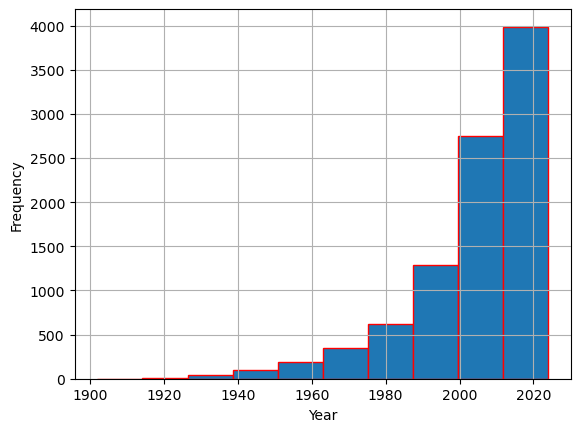

In [45]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(df['release_date'].values)
plt.hist(df['release_date'].values, bins=bins, edgecolor='red')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
genre_values = {}

for i in range(df.shape[0]):
    values = str(df['genres'].values[i]).split(',')
    
    for val in values:
        val = val.replace(' ', '')
        
        if not val in genre_values.keys():
            genre_values[val] = 1
        else:
            genre_values[val] += 1

genre_values

{'Drama': 4157,
 'Crime': 1411,
 'History': 431,
 'War': 299,
 'Animation': 849,
 'Family': 1065,
 'Fantasy': 1082,
 'Comedy': 3393,
 'Romance': 1586,
 'Action': 2175,
 'Thriller': 2524,
 'Adventure': 1576,
 'Western': 139,
 'Horror': 1338,
 'Mystery': 884,
 'ScienceFiction': 1140,
 'Music': 260,
 'TVMovie': 107}

In [47]:
del df['id']
del df['title']
del df['overview']

In [48]:
df['original_language'] = make_numerics(df['original_language'])

In [49]:
for i in range(df.shape[0]):
    if df['release_date'].values[i] <= 1990:
        df['release_date'].values[i] = 0
        
    elif 1990 < df['release_date'].values[i] <= 2010:
        df['release_date'].values[i] = 1
    
    else:
        df['release_date'].values[i] = 2

In [50]:
genre_values = list(genre_values.keys())

for genre in genre_values:
    new_col = []
    
    for i in range(df.shape[0]):
        vals = str(df['genres'].values[i]).split(',')
        
        for i in range(len(vals)):
            vals[i] = vals[i].replace(' ', '')
        
        if genre in vals:
            new_col.append(1)
        else:
            new_col.append(0)
    
    df[genre] = np.array(new_col)

In [51]:
del df['genres']

In [52]:
df.head(10)


,release_date,original_language,popularity,vote_count,vote_average,Drama,Crime,History,War,Animation,...,Romance,Action,Thriller,Adventure,Western,Horror,Mystery,ScienceFiction,Music,TVMovie
0,1,0,124.582,26066,8.703,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,199.537,19757,8.695,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,129.056,11936,8.577,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,108.254,15341,8.567,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,69.908,8212,8.500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,109.368,15862,8.537,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,2,35.669,4376,8.536,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,113.725,31845,8.500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,2,3,96.983,17476,8.510,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,135.823,16768,8.506,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df['popularity'].values
del df['popularity']
X = df.values
del df

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X, y

In [55]:
compare_models('reg',
              ['cat', 'ada', 'dtr', 'raf', 'ext', 'lin'],
              ['sq'],
              X_train, y_train, X_test, y_test)

CatBoost
Mean Squared Error: 2104.599008297271
***
AdaBoost
Mean Squared Error: 4532.139171889925
***
Decision Tree
Mean Squared Error: 3153.977315756829
***
Random Forest
Mean Squared Error: 1952.5376190043294
***
Extra Tree
Mean Squared Error: 4772.125589213712
***
Linear Regression
Mean Squared Error: 1763.702361111634
***


In [57]:
model = lin()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
y_dif = []

for i in range(y_test.shape[0]):
    y_dif.append(y_pred[i] - y_test[i])

y_dif = np.array(y_dif)

In [59]:
print('main difference between actual and predictions: {}'.format(str(np.mean(np.abs(y_dif)))))

main difference between actual and predictions: 21.519624763740893


In [60]:
text = '| actual | prediction | difference (pred - actual) |\n| --- | --- | --- |'

for i in range(y_test.shape[0]):
    text += '\n| {} | {} | {} |'.format(str(y_test[i]), str(y_pred[i]), str(y_dif[i]))

Markdown(text)

| actual | prediction | difference (pred - actual) |
| --- | --- | --- |
| 33.078 | 37.16843774470679 | 4.09043774470679 |
| 48.886 | 87.91392527191482 | 39.02792527191482 |
| 25.751 | 38.329500283365 | 12.578500283364999 |
| 103.764 | 53.2850832735265 | -50.47891672647349 |
| 49.843 | 63.91939137461109 | 14.076391374611084 |
| 125.41 | 52.21183930701951 | -73.19816069298048 |
| 22.681 | 35.00220664740154 | 12.321206647401542 |
| 17.564 | 41.42030992414844 | 23.85630992414844 |
| 13.045 | 21.662096041040968 | 8.617096041040968 |
| 28.094 | 37.28738403667268 | 9.193384036672676 |
| 17.576 | 35.22902450742213 | 17.65302450742213 |
| 60.799 | 56.210681771249334 | -4.588318228750666 |
| 45.617 | 42.84164483915692 | -2.775355160843077 |
| 68.75 | 69.72202356765811 | 0.9720235676581126 |
| 24.17 | 18.54205157322405 | -5.627948426775951 |
| 51.816 | 59.857214361088914 | 8.041214361088912 |
| 39.039 | 22.678205252731473 | -16.36079474726853 |
| 16.969 | 29.58596609319423 | 12.616966093194229 |
| 31.518 | 48.305917166506 | 16.787917166506 |
| 13.952 | 28.02390019259269 | 14.071900192592691 |
| 42.741 | 52.03710911183273 | 9.296109111832727 |
| 38.402 | 54.52742942492171 | 16.125429424921712 |
| 60.332 | 51.17450352733953 | -9.157496472660469 |
| 80.278 | 48.372024168928284 | -31.90597583107172 |
| 32.13 | 46.399216972219214 | 14.269216972219212 |
| 42.68 | 25.076569695715975 | -17.603430304284025 |
| 11.988 | 28.472388261973684 | 16.484388261973685 |
| 18.715 | 35.94667000422968 | 17.23167000422968 |
| 18.51 | 26.912773991642645 | 8.402773991642643 |
| 23.044 | 32.2365113165533 | 9.192511316553297 |
| 17.689 | 38.70604924520937 | 21.01704924520937 |
| 23.33 | 27.177236296418208 | 3.8472362964182096 |
| 76.94 | 184.20129649904356 | 107.26129649904357 |
| 27.842 | 42.07884989119355 | 14.23684989119355 |
| 140.752 | 77.71613927103957 | -63.035860728960444 |
| 12.254 | 44.19767455222874 | 31.943674552228742 |
| 58.898 | 53.90069705868617 | -4.9973029413138335 |
| 53.18 | 42.92758478687886 | -10.25241521312114 |
| 25.731 | 41.11630117013116 | 15.385301170131157 |
| 44.873 | 62.70756882622687 | 17.83456882622687 |
| 20.993 | 46.96718441445055 | 25.97418441445055 |
| 59.164 | 36.18415625462244 | -22.979843745377565 |
| 72.876 | 55.35929362389009 | -17.516706376109916 |
| 50.403 | 43.631294442939456 | -6.7717055570605424 |
| 18.98 | 29.587979403147777 | 10.607979403147777 |
| 24.094 | 48.42590148725137 | 24.331901487251372 |
| 33.124 | 20.29856676259309 | -12.825433237406912 |
| 96.858 | 62.04923914508279 | -34.80876085491722 |
| 47.96 | 65.68307560762156 | 17.72307560762156 |
| 30.55 | 35.78992561308153 | 5.239925613081528 |
| 14.058 | 24.3214087635753 | 10.263408763575299 |
| 57.302 | 40.24309743232458 | -17.058902567675418 |
| 17.381 | 43.174625285936905 | 25.793625285936905 |
| 71.382 | 88.6077087946575 | 17.225708794657493 |
| 30.536 | 40.32668682921323 | 9.790686829213229 |
| 69.941 | 33.53783099780173 | -36.403169002198275 |
| 14.793 | 37.828619729182584 | 23.035619729182585 |
| 19.415 | 29.097979053669363 | 9.682979053669364 |
| 24.679 | 32.9106129653084 | 8.231612965308404 |
| 17.814 | 26.690587614387915 | 8.876587614387915 |
| 12.34 | 39.2072373410772 | 26.867237341077203 |
| 128.469 | 49.68100860776739 | -78.78799139223261 |
| 35.215 | 38.53788517012303 | 3.3228851701230298 |
| 28.038 | 30.043928153650555 | 2.0059281536505544 |
| 26.217 | 42.32541497139254 | 16.10841497139254 |
| 54.232 | 25.53253247707189 | -28.69946752292811 |
| 33.843 | 37.75354019697895 | 3.9105401969789497 |
| 25.783 | 65.4766434779664 | 39.693643477966404 |
| 44.766 | 38.98136032952181 | -5.784639670478185 |
| 69.829 | 57.88539804684917 | -11.943601953150825 |
| 22.071 | 29.99411786097061 | 7.92311786097061 |
| 25.768 | 32.78434134730923 | 7.016341347309229 |
| 101.383 | 87.21678555943441 | -14.166214440565582 |
| 46.173 | 49.70676082370279 | 3.533760823702785 |
| 26.689 | 30.227512654898447 | 3.5385126548984474 |
| 29.537 | 32.26975506313296 | 2.732755063132963 |
| 293.297 | 50.71183458355956 | -242.58516541644047 |
| 18.133 | 28.904456484179853 | 10.771456484179854 |
| 21.545 | 33.74151966242136 | 12.196519662421359 |
| 31.57 | 25.734045541689127 | -5.835954458310873 |
| 45.829 | 34.39342291306228 | -11.43557708693772 |
| 50.998 | 48.78155301564626 | -2.2164469843537375 |
| 227.476 | 59.34107159738074 | -168.13492840261927 |
| 38.38 | 54.89157493510873 | 16.511574935108726 |
| 13.631 | 27.116423725316956 | 13.485423725316956 |
| 21.081 | 54.384357646103034 | 33.30335764610304 |
| 30.595 | 38.87237205385032 | 8.277372053850321 |
| 16.126 | 38.88323338076501 | 22.757233380765012 |
| 22.481 | 16.61322907248875 | -5.867770927511252 |
| 31.931 | 44.513394387326024 | 12.582394387326023 |
| 37.843 | 35.45819519386297 | -2.3848048061370335 |
| 20.252 | 35.03872426451402 | 14.786724264514024 |
| 54.75 | 83.87046961443653 | 29.12046961443653 |
| 9.416 | 37.155295006885524 | 27.739295006885524 |
| 19.194 | 33.26074284016128 | 14.066742840161279 |
| 25.173 | 25.51734104483908 | 0.34434104483908 |
| 36.715 | 41.70260310394743 | 4.9876031039474285 |
| 47.158 | 42.533875422838 | -4.624124577162 |
| 29.008 | 48.737082586891624 | 19.729082586891625 |
| 50.562 | 37.21164461779088 | -13.350355382209116 |
| 44.487 | 19.58230752290877 | -24.90469247709123 |
| 28.45 | 55.97061788858171 | 27.520617888581707 |
| 41.94 | 50.66827789520024 | 8.728277895200243 |
| 29.164 | 32.93838653558251 | 3.774386535582508 |
| 21.35 | 27.630538895333885 | 6.280538895333883 |
| 37.16 | 28.739654275842433 | -8.420345724157563 |
| 82.141 | 65.3231068115258 | -16.8178931884742 |
| 65.343 | 62.20322323187563 | -3.1397767681243707 |
| 33.784 | 47.15296381175451 | 13.368963811754512 |
| 27.525 | 32.14945328019632 | 4.62445328019632 |
| 36.5 | 57.482148184265945 | 20.982148184265945 |
| 18.596 | 23.261879005709268 | 4.665879005709268 |
| 188.831 | 82.29972578574274 | -106.53127421425725 |
| 89.741 | 36.58666630849587 | -53.15433369150413 |
| 240.379 | 51.68948824546822 | -188.68951175453176 |
| 35.581 | 49.71589131263911 | 14.134891312639105 |
| 80.579 | 64.28140055864415 | -16.297599441355842 |
| 40.153 | 57.16458937094507 | 17.011589370945075 |
| 38.793 | 24.37497325206992 | -14.418026747930078 |
| 26.628 | 30.17657380185964 | 3.5485738018596393 |
| 19.758 | 34.522680473508196 | 14.764680473508196 |
| 25.546 | 23.59467894625041 | -1.951321053749588 |
| 67.022 | 65.12623204553668 | -1.8957679544633237 |
| 12.628 | 49.59684114976326 | 36.96884114976326 |
| 29.345 | 42.64393656657219 | 13.298936566572188 |
| 42.346 | 44.82362992474447 | 2.477629924744477 |
| 26.357 | 31.350783871293906 | 4.993783871293907 |
| 60.281 | 50.576661731112075 | -9.704338268887923 |
| 27.081 | 29.70957138923429 | 2.628571389234292 |
| 17.627 | 44.92786267858886 | 27.30086267858886 |
| 34.994 | 46.13956426142396 | 11.145564261423964 |
| 240.73 | 109.90181980005616 | -130.82818019994383 |
| 100.518 | 85.89393550146937 | -14.624064498530629 |
| 30.443 | 38.74409081893537 | 8.301090818935368 |
| 30.064 | 66.36425986038788 | 36.300259860387875 |
| 18.848 | 24.87158544362019 | 6.023585443620192 |
| 33.534 | 30.84100581232324 | -2.69299418767676 |
| 36.66 | 32.90263336312541 | -3.757366636874586 |
| 33.777 | 61.03280134704453 | 27.25580134704453 |
| 34.647 | 28.790868857581657 | -5.8561311424183415 |
| 22.109 | 38.10993632173685 | 16.00093632173685 |
| 24.585 | 39.957332416289326 | 15.372332416289325 |
| 33.914 | 78.47324950232024 | 44.55924950232024 |
| 30.773 | 38.048530394189136 | 7.275530394189136 |
| 22.942 | 44.83450125105389 | 21.892501251053886 |
| 276.464 | 167.61907574772408 | -108.84492425227592 |
| 22.352 | 16.705697067101106 | -5.6463029328988945 |
| 47.481 | 41.45461897617093 | -6.0263810238290745 |
| 75.196 | 45.96003158770845 | -29.235968412291548 |
| 318.462 | 124.95720761651222 | -193.50479238348777 |
| 40.988 | 31.137639691113925 | -9.850360308886074 |
| 22.941 | 41.8383802900318 | 18.8973802900318 |
| 13.325 | 37.169250403224574 | 23.844250403224574 |
| 28.292 | 39.51771108489333 | 11.225711084893327 |
| 16.112 | 29.290190301815827 | 13.178190301815828 |
| 46.471 | 32.99815110561449 | -13.472848894385507 |
| 74.822 | 34.62788239124294 | -40.19411760875706 |
| 73.997 | 65.60320017851893 | -8.393799821481068 |
| 69.874 | 40.30206874145469 | -29.571931258545305 |
| 63.241 | 39.13956901089272 | -24.10143098910728 |
| 37.923 | 68.94572562907905 | 31.022725629079048 |
| 19.469 | 43.98495028052475 | 24.51595028052475 |
| 26.16 | 30.8370912459227 | 4.6770912459227 |
| 29.515 | 54.91259052256236 | 25.39759052256236 |
| 55.661 | 51.35909196366568 | -4.301908036334318 |
| 24.396 | 31.365919225360187 | 6.9699192253601865 |
| 30.428 | 43.788074115308255 | 13.360074115308255 |
| 21.899 | 43.6177003818245 | 21.718700381824497 |
| 31.276 | 46.79828591441582 | 15.522285914415821 |
| 25.042 | 49.45644490469393 | 24.41444490469393 |
| 26.852 | 19.608753506772274 | -7.243246493227726 |
| 22.734 | 38.328698913285436 | 15.594698913285434 |
| 2.673 | 46.67044559713212 | 43.99744559713212 |
| 108.254 | 149.11177463749857 | 40.857774637498565 |
| 39.356 | 51.22773314230532 | 11.871733142305317 |
| 36.243 | 31.93684205049143 | -4.306157949508574 |
| 17.248 | 31.552414693154 | 14.304414693153998 |
| 34.565 | 31.15025699225867 | -3.414743007741329 |
| 23.79 | 17.974195679745428 | -5.815804320254571 |
| 75.238 | 72.9940800674598 | -2.2439199325401944 |
| 23.584 | 31.124538682854485 | 7.540538682854486 |
| 31.681 | 37.012969923450605 | 5.331969923450604 |
| 21.222 | 53.70277715307008 | 32.48077715307008 |
| 61.542 | 96.44983901320117 | 34.90783901320117 |
| 20.499 | 31.15594574919541 | 10.656945749195412 |
| 35.203 | 23.583171377392446 | -11.619828622607557 |
| 59.21 | 50.01700128372709 | -9.19299871627291 |
| 23.558 | 32.176749261684755 | 8.618749261684755 |
| 32.565 | 30.24697097491771 | -2.3180290250822893 |
| 27.0 | 56.94699056193871 | 29.946990561938712 |
| 23.307 | 20.5342731630694 | -2.772726836930598 |
| 21.895 | 35.68232151352394 | 13.787321513523938 |
| 17.968 | 39.9841491161631 | 22.016149116163103 |
| 48.739 | 43.003065170541554 | -5.735934829458444 |
| 31.994 | 39.37070938084514 | 7.376709380845142 |
| 34.871 | 45.27955146443491 | 10.408551464434908 |
| 35.553 | 11.981678991382225 | -23.571321008617772 |
| 56.156 | 44.34406974537756 | -11.811930254622439 |
| 46.959 | 34.3152723969573 | -12.643727603042706 |
| 25.579 | 36.613311340406646 | 11.034311340406646 |
| 38.824 | 55.089525956092736 | 16.265525956092738 |
| 56.299 | 51.04604198715794 | -5.252958012842058 |
| 26.767 | 14.813951227551534 | -11.953048772448465 |
| 16.256 | 24.905482087692718 | 8.649482087692718 |
| 16.948 | 31.53518371913782 | 14.587183719137819 |
| 21.219 | 24.30322432795618 | 3.0842243279561785 |
| 32.983 | 25.934946045999695 | -7.048053954000302 |
| 73.99 | 77.86365112556746 | 3.873651125567463 |
| 91.677 | 142.40084696442312 | 50.72384696442312 |
| 66.764 | 115.77242141137742 | 49.00842141137743 |
| 53.575 | 34.59738950925622 | -18.977610490743785 |
| 34.81 | 30.56578311708013 | -4.244216882919872 |
| 13.94 | 38.65367694540017 | 24.713676945400174 |
| 16.782 | 34.10587126454726 | 17.32387126454726 |
| 55.635 | 61.946810474562646 | 6.311810474562648 |
| 47.612 | 62.236276737320985 | 14.624276737320983 |
| 16.585 | 26.413703545749343 | 9.828703545749342 |
| 112.81 | 162.89214249760508 | 50.082142497605076 |
| 42.624 | 37.193700697034195 | -5.430299302965807 |
| 23.424 | 35.704585848720946 | 12.280585848720946 |
| 44.033 | 44.77630836768437 | 0.7433083676843708 |
| 43.953 | 39.28256048739451 | -4.6704395126054905 |
| 39.982 | 40.00261023783243 | 0.02061023783242888 |
| 30.642 | 32.72524286554472 | 2.0832428655447224 |
| 40.86 | 67.57180565906444 | 26.71180565906444 |
| 43.032 | 35.50424454758079 | -7.527755452419207 |
| 30.729 | 31.51354175294457 | 0.7845417529445697 |
| 13.003 | 20.110019604390743 | 7.107019604390743 |
| 19.861 | 25.99438709160257 | 6.133387091602568 |
| 21.828 | 35.90487416158123 | 14.076874161581234 |
| 86.95 | 49.9961757881994 | -36.9538242118006 |
| 21.359 | 38.98428881086723 | 17.625288810867225 |
| 23.979 | 36.594945722871024 | 12.615945722871025 |
| 44.83 | 29.525984495581795 | -15.304015504418203 |
| 32.616 | 38.60191583456663 | 5.985915834566633 |
| 9.318 | 17.387044510728494 | 8.069044510728494 |
| 27.927 | 50.008750671174816 | 22.081750671174817 |
| 28.94 | 37.50807246366221 | 8.568072463662208 |
| 34.888 | 62.856792178014935 | 27.968792178014937 |
| 69.581 | 60.20968041099473 | -9.371319589005275 |
| 64.234 | 68.5810655562776 | 4.347065556277599 |
| 10.068 | 21.59294319203412 | 11.52494319203412 |
| 56.347 | 32.20479983189301 | -24.14220016810699 |
| 26.813 | 53.682594328873485 | 26.869594328873486 |
| 20.773 | 22.58208812081086 | 1.8090881208108591 |
| 10.78 | 43.626065524341605 | 32.846065524341604 |
| 81.134 | 134.36623098367212 | 53.232230983672125 |
| 8.873 | 37.218650492187436 | 28.34565049218744 |
| 62.196 | 40.51575072208947 | -21.680249277910526 |
| 39.759 | 35.563504108082064 | -4.195495891917936 |
| 45.818 | 55.97971994310759 | 10.161719943107592 |
| 1.261 | 47.11839167995205 | 45.857391679952045 |
| 14.131 | 36.70224221199993 | 22.57124221199993 |
| 22.027 | 48.794879223173886 | 26.767879223173885 |
| 18.793 | 36.29306435964643 | 17.50006435964643 |
| 34.937 | 35.960219202672796 | 1.0232192026727986 |
| 29.961 | 34.43909258178962 | 4.478092581789625 |
| 52.377 | 57.09424975167692 | 4.717249751676917 |
| 14.477 | 16.850688071215366 | 2.3736880712153656 |
| 17.786 | 23.639069529438892 | 5.853069529438891 |
| 21.79 | 35.41588266928058 | 13.625882669280578 |
| 17.437 | 55.37263430449023 | 37.93563430449022 |
| 43.84 | 68.65299931988233 | 24.812999319882323 |
| 38.996 | 28.179059208379208 | -10.816940791620794 |
| 46.69 | 84.42859150381528 | 37.738591503815286 |
| 90.387 | 65.32722296302231 | -25.059777036977692 |
| 49.372 | 29.465985649468088 | -19.906014350531912 |
| 20.121 | 41.492177345549514 | 21.371177345549516 |
| 12.179 | 22.372079996229317 | 10.193079996229317 |
| 60.27 | 41.75550849908108 | -18.514491500918922 |
| 292.211 | 274.18060490433515 | -18.030395095664858 |
| 253.961 | 134.41583564629508 | -119.54516435370493 |
| 60.154 | 68.27431501828266 | 8.12031501828266 |
| 71.936 | 92.89976201188546 | 20.96376201188545 |
| 24.36 | 34.21644395586326 | 9.856443955863263 |
| 22.293 | 54.06817712138115 | 31.775177121381148 |
| 25.817 | 29.093198686327447 | 3.2761986863274473 |
| 25.528 | 49.91343995009408 | 24.38543995009408 |
| 24.133 | 34.57225755929959 | 10.439257559299588 |
| 17.828 | 44.271958375821846 | 26.443958375821847 |
| 41.832 | 55.606400676875175 | 13.774400676875175 |
| 35.363 | 38.75224239544617 | 3.3892423954461677 |
| 72.798 | 50.487378882136774 | -22.310621117863228 |
| 43.629 | 32.50595500369528 | -11.12304499630472 |
| 76.041 | 74.60284643029408 | -1.4381535697059178 |
| 21.435 | 33.18567365368541 | 11.750673653685414 |
| 53.579 | 52.812156250359656 | -0.7668437496403442 |
| 17.215 | 29.804689297404842 | 12.589689297404842 |
| 66.888 | 96.62807525171817 | 29.740075251718167 |
| 12.082 | 22.361772744666652 | 10.279772744666651 |
| 35.168 | 46.61639851778936 | 11.448398517789357 |
| 58.841 | 38.28983123941722 | -20.551168760582783 |
| 31.764 | 19.126900520789356 | -12.637099479210644 |
| 68.581 | 87.37718846404704 | 18.796188464047034 |
| 22.922 | 26.314762522871717 | 3.392762522871717 |
| 25.02 | 44.19408675811099 | 19.17408675811099 |
| 45.02 | 32.907478262540785 | -12.112521737459218 |
| 111.452 | 9.636065104600732 | -101.81593489539927 |
| 33.956 | 48.420101564719936 | 14.464101564719932 |
| 29.918 | 50.456376183008935 | 20.538376183008936 |
| 17.772 | 28.758325705907694 | 10.986325705907696 |
| 634.211 | 63.25935905339761 | -570.9516409466024 |
| 100.849 | 95.91725634764157 | -4.931743652358435 |
| 75.841 | 54.72595556104344 | -21.115044438956552 |
| 47.175 | 51.081235142914146 | 3.9062351429141486 |
| 29.894 | 26.912468534156652 | -2.9815314658433465 |
| 10.91 | 35.1686941431886 | 24.258694143188603 |
| 21.915 | 39.27896701606425 | 17.36396701606425 |
| 13.654 | 24.22772185667494 | 10.57372185667494 |
| 155.689 | 177.55311109139504 | 21.864111091395046 |
| 17.997 | 40.66501383637241 | 22.66801383637241 |
| 264.897 | 73.51401251757542 | -191.38298748242457 |
| 52.503 | 49.12991854174063 | -3.373081458259371 |
| 161.118 | 70.45977451811015 | -90.65822548188984 |
| 57.804 | 55.68553036220106 | -2.1184696377989454 |
| 43.141 | 42.600535425118885 | -0.5404645748811134 |
| 15.634 | 30.280853810920846 | 14.646853810920845 |
| 48.265 | 75.5269626348082 | 27.2619626348082 |
| 28.037 | 46.24768953408405 | 18.210689534084054 |
| 128.083 | 57.70478880875351 | -70.37821119124649 |
| 17.361 | 40.18831559414861 | 22.82731559414861 |
| 257.394 | 63.754792433635906 | -193.6392075663641 |
| 26.897 | 33.36014716414693 | 6.463147164146932 |
| 22.289 | 34.69471517470885 | 12.405715174708845 |
| 34.667 | 57.80262607269224 | 23.13562607269224 |
| 20.932 | 40.603764217301034 | 19.671764217301035 |
| 30.985 | 52.099079912490446 | 21.114079912490446 |
| 144.481 | 231.52771459988634 | 87.04671459988634 |
| 24.293 | 38.448521946223075 | 14.155521946223075 |
| 19.011 | 43.28374671335059 | 24.27274671335059 |
| 46.509 | 47.158658634947976 | 0.6496586349479756 |
| 77.142 | 52.216966155453015 | -24.92503384454698 |
| 74.092 | 70.70883831877151 | -3.3831616812284864 |
| 78.267 | 60.25816835700463 | -18.008831642995368 |
| 53.999 | 66.29671271959921 | 12.297712719599211 |
| 27.331 | 32.36190883379958 | 5.030908833799582 |
| 52.644 | 51.22101835761044 | -1.4229816423895585 |
| 31.554 | 51.50573760655278 | 19.95173760655278 |
| 36.189 | 31.52136359619533 | -4.667636403804671 |
| 23.956 | 23.178025429784064 | -0.7779745702159353 |
| 38.108 | 26.050086975896463 | -12.057913024103534 |
| 13.938 | 22.661051879882677 | 8.723051879882677 |
| 57.302 | 61.18374028220597 | 3.8817402822059677 |
| 30.64 | 27.606713370962794 | -3.0332866290372067 |
| 106.988 | 145.19192455120938 | 38.20392455120938 |
| 8.95 | 24.090947336656193 | 15.140947336656193 |
| 39.21 | 102.52486924290537 | 63.31486924290537 |
| 16.839 | 57.32607687251552 | 40.48707687251552 |
| 22.226 | 36.6907198293984 | 14.464719829398398 |
| 17.685 | 36.6508609416726 | 18.9658609416726 |
| 111.95 | 122.47918942200636 | 10.529189422006354 |
| 25.655 | 25.88830441552652 | 0.23330441552651848 |
| 230.973 | 209.27888511005986 | -21.694114889940153 |
| 18.626 | 36.09787752393168 | 17.471877523931678 |
| 16.158 | 50.66596482609366 | 34.50796482609366 |
| 19.859 | 58.815017902020635 | 38.95601790202063 |
| 26.117 | 36.58847196297088 | 10.471471962970877 |
| 25.479 | 22.748217838802354 | -2.730782161197645 |
| 37.687 | 48.355653788058994 | 10.668653788058997 |
| 37.022 | 37.54163959834272 | 0.5196395983427209 |
| 106.93 | 131.1410767100098 | 24.21107671000979 |
| 20.949 | 36.588045423899366 | 15.639045423899365 |
| 51.316 | 53.888897038072066 | 2.572897038072064 |
| 36.391 | 39.149283970737635 | 2.7582839707376365 |
| 81.689 | 57.319666916988275 | -24.369333083011718 |
| 54.13 | 61.22384939277298 | 7.093849392772981 |
| 21.704 | 27.050116362265896 | 5.346116362265896 |
| 9.939 | 30.101097669559167 | 20.162097669559166 |
| 60.659 | 56.898208441873685 | -3.7607915581263143 |
| 43.326 | 34.91958064851521 | -8.406419351484793 |
| 47.324 | 57.5338076476588 | 10.2098076476588 |
| 37.225 | 30.731195418797505 | -6.493804581202497 |
| 20.279 | 38.50836561577879 | 18.229365615778793 |
| 37.749 | 32.961009138637245 | -4.787990861362758 |
| 24.145 | 59.76792839977892 | 35.622928399778914 |
| 20.928 | 35.00031681809761 | 14.072316818097608 |
| 30.717 | 73.74361924042122 | 43.026619240421226 |
| 33.092 | 50.62176928996431 | 17.529769289964314 |
| 28.3 | 60.27098782474851 | 31.97098782474851 |
| 13.92 | 48.86875281682406 | 34.94875281682406 |
| 21.036 | 37.16338584534483 | 16.127385845344826 |
| 22.625 | 28.460198215357046 | 5.835198215357046 |
| 17.51 | 15.053298406259088 | -2.456701593740913 |
| 24.051 | 49.364077631605845 | 25.313077631605847 |
| 43.355 | 55.144457778234504 | 11.789457778234507 |
| 107.05 | 35.04192349943266 | -72.00807650056734 |
| 14.984 | 31.522379424423328 | 16.538379424423326 |
| 15.06 | 19.29351786181949 | 4.233517861819488 |
| 36.859 | 46.25341332853065 | 9.394413328530646 |
| 68.912 | 40.33153635267343 | -28.580463647326575 |
| 58.808 | 61.69989529391821 | 2.8918952939182105 |
| 42.824 | 65.54545904678241 | 22.721459046782414 |
| 1.645 | 31.1889455177743 | 29.5439455177743 |
| 12.521 | 27.867246870886405 | 15.346246870886404 |
| 180.686 | 59.32184905303293 | -121.36415094696707 |
| 24.882 | 35.61561647310295 | 10.733616473102952 |
| 24.448 | 46.9979491071069 | 22.549949107106897 |
| 28.475 | 62.7613386793334 | 34.2863386793334 |
| 203.185 | 108.27990954881241 | -94.90509045118759 |
| 52.742 | 46.41911705801723 | -6.322882941982769 |
| 19.323 | 23.227465708600292 | 3.9044657086002914 |
| 20.129 | 27.75198539298112 | 7.622985392981118 |
| 26.317 | 51.104604050208216 | 24.787604050208216 |
| 11.396 | 33.41130324553459 | 22.01530324553459 |
| 59.225 | 34.58390211133557 | -24.641097888664433 |
| 48.148 | 64.72398212018422 | 16.575982120184214 |
| 12.777 | 37.19465857141616 | 24.417658571416162 |
| 53.002 | 106.75877090144238 | 53.75677090144237 |
| 22.827 | 40.657043108904524 | 17.830043108904523 |
| 14.384 | 30.34642806799269 | 15.96242806799269 |
| 33.405 | 30.541722088238416 | -2.8632779117615854 |
| 20.226 | 27.918398278521906 | 7.692398278521907 |
| 23.504 | 43.41453043794059 | 19.91053043794059 |
| 28.323 | 30.98613916598211 | 2.663139165982109 |
| 20.278 | 45.65897760047002 | 25.38097760047002 |
| 25.239 | 36.973795754555475 | 11.734795754555474 |
| 11.25 | 45.4125060282983 | 34.1625060282983 |
| 18.501 | 23.360439368304057 | 4.859439368304056 |
| 15.793 | 39.06576769625121 | 23.272767696251208 |
| 21.634 | 22.180283070160833 | 0.5462830701608326 |
| 68.171 | 183.13947828571293 | 114.96847828571292 |
| 51.346 | 62.812075656831546 | 11.46607565683155 |
| 36.467 | 53.88303854199203 | 17.41603854199203 |
| 28.423 | 41.18637055166631 | 12.76337055166631 |
| 40.284 | 32.987424176241696 | -7.296575823758303 |
| 24.938 | 47.878962916058136 | 22.940962916058137 |
| 26.611 | 33.657686100914916 | 7.046686100914915 |
| 34.786 | 36.802887629023125 | 2.016887629023124 |
| 41.291 | 62.877559260860544 | 21.586559260860547 |
| 46.66 | 42.31669428881403 | -4.34330571118597 |
| 19.705 | 24.359609193983324 | 4.654609193983326 |
| 25.464 | 17.168436352529888 | -8.29556364747011 |
| 42.991 | 50.28992406698389 | 7.2989240669838935 |
| 84.059 | 72.73235257232497 | -11.326647427675027 |
| 57.62 | 43.687349125785566 | -13.932650874214431 |
| 15.257 | 33.99142787931351 | 18.734427879313515 |
| 24.251 | 36.05584317979042 | 11.80484317979042 |
| 34.244 | 32.76490389811589 | -1.4790961018841102 |
| 18.55 | 46.50739553143155 | 27.957395531431548 |
| 61.642 | 44.605302794444945 | -17.036697205555058 |
| 25.474 | 55.30091512137911 | 29.826915121379113 |
| 10.869 | 25.91832665140913 | 15.049326651409132 |
| 15.203 | 28.086069568269558 | 12.883069568269558 |
| 47.689 | 44.02668044763191 | -3.662319552368089 |
| 20.303 | 31.249263368810404 | 10.946263368810403 |
| 91.918 | 58.66788100032654 | -33.25011899967347 |
| 40.185 | 55.56463808105986 | 15.37963808105986 |
| 34.612 | 36.24784737552522 | 1.6358473755252163 |
| 39.924 | 38.62670776632951 | -1.2972922336704897 |
| 22.821 | 52.29421910526482 | 29.47321910526482 |
| 24.028 | 41.934929461574505 | 17.906929461574506 |
| 76.713 | 101.96815481151947 | 25.255154811519475 |
| 20.614 | 27.07849714850105 | 6.464497148501049 |
| 72.689 | 49.77801335291668 | -22.910986647083313 |
| 42.708 | 37.08764448976356 | -5.620355510236436 |
| 25.82 | 87.01277348081993 | 61.19277348081993 |
| 59.413 | 74.09929023870558 | 14.686290238705581 |
| 17.95 | 34.667138444248515 | 16.717138444248516 |
| 65.172 | 35.35049483726034 | -29.821505162739655 |
| 59.274 | 44.346669840850616 | -14.927330159149385 |
| 29.205 | 36.46872763797329 | 7.26372763797329 |
| 29.265 | 44.65347341941864 | 15.388473419418638 |
| 24.448 | 34.59059935582231 | 10.142599355822313 |
| 44.85 | 47.74575287442848 | 2.8957528744284815 |
| 28.528 | 31.30251657521557 | 2.7745165752155714 |
| 24.672 | 32.08714452029277 | 7.415144520292767 |
| 8.619 | 27.47641661040914 | 18.85741661040914 |
| 40.173 | 49.60500971999394 | 9.432009719993935 |
| 22.033 | 34.053517980445754 | 12.020517980445753 |
| 26.983 | 30.62021506579125 | 3.637215065791249 |
| 20.56 | 28.536102450758506 | 7.976102450758507 |
| 106.425 | 53.673075211314874 | -52.75192478868512 |
| 17.422 | 57.77869961217598 | 40.35669961217597 |
| 25.491 | 41.88887095934758 | 16.39787095934758 |
| 17.635 | 61.33304771467875 | 43.69804771467875 |
| 29.3 | 55.053979218589554 | 25.753979218589553 |
| 7.635 | 18.803390279078563 | 11.168390279078563 |
| 37.053 | 43.29192378429364 | 6.23892378429364 |
| 93.784 | 209.81946449068113 | 116.03546449068112 |
| 37.459 | 31.420288429571606 | -6.038711570428397 |
| 20.862 | 57.63521470889945 | 36.773214708899445 |
| 21.427 | 31.085114678575927 | 9.658114678575927 |
| 13.192 | 30.04803296881206 | 16.85603296881206 |
| 55.141 | 208.74975137302738 | 153.6087513730274 |
| 143.526 | 51.17857748962691 | -92.3474225103731 |
| 24.05 | 33.549005835829 | 9.499005835829 |
| 110.975 | 89.84519035577833 | -21.129809644221666 |
| 36.892 | 37.86253991898938 | 0.970539918989374 |
| 29.977 | 63.976260878018444 | 33.99926087801845 |
| 23.628 | 53.09382674208445 | 29.465826742084452 |
| 18.726 | 29.37499120243708 | 10.648991202437081 |
| 98.427 | 124.21015002279353 | 25.78315002279352 |
| 14.568 | 31.154895137427452 | 16.586895137427454 |
| 12.255 | 22.411187528399374 | 10.156187528399373 |
| 15.895 | 30.2537591115508 | 14.3587591115508 |
| 82.069 | 50.43965392306611 | -31.629346076933892 |
| 19.964 | 31.271807209823827 | 11.307807209823828 |
| 24.828 | 25.642588489699556 | 0.8145884896995561 |
| 32.296 | 35.23012956529853 | 2.9341295652985337 |
| 91.456 | 39.3734496995987 | -52.0825503004013 |
| 35.648 | 40.32236855063665 | 4.674368550636643 |
| 35.596 | 66.08995763738429 | 30.49395763738429 |
| 29.845 | 10.609510343361706 | -19.235489656638293 |
| 52.797 | 42.96606960135518 | -9.830930398644817 |
| 16.562 | 31.17697291730466 | 14.614972917304659 |
| 47.197 | 44.55144145438063 | -2.645558545619373 |
| 26.865 | 40.31402248544004 | 13.449022485440043 |
| 23.863 | 103.1053786526229 | 79.2423786526229 |
| 32.182 | 30.571082612382995 | -1.6109173876170075 |
| 23.59 | 43.40226614521465 | 19.812266145214647 |
| 52.496 | 44.336390994953426 | -8.159609005046576 |
| 63.78 | 56.1676428248846 | -7.612357175115399 |
| 73.092 | 86.89972425209825 | 13.807724252098254 |
| 32.732 | 29.964671483753357 | -2.7673285162466428 |
| 9.357 | 59.11322662544551 | 49.756226625445514 |
| 13.607 | 36.077048029577675 | 22.470048029577676 |
| 16.484 | 10.324058229989852 | -6.15994177001015 |
| 13.219 | 36.997728645047324 | 23.778728645047323 |
| 19.181 | 27.768693145492406 | 8.587693145492405 |
| 34.78 | 42.0312798930236 | 7.2512798930236 |
| 23.617 | 34.356824930735556 | 10.739824930735555 |
| 50.911 | 35.736799218699524 | -15.174200781300478 |
| 15.341 | 26.075945531996275 | 10.734945531996276 |
| 45.161 | 38.5381974218658 | -6.622802578134198 |
| 28.59 | 52.33298436472463 | 23.74298436472463 |
| 64.696 | 51.63977263883084 | -13.056227361169157 |
| 28.477 | 44.622606575635665 | 16.145606575635664 |
| 18.566 | 18.580771167893204 | 0.014771167893204762 |
| 23.333 | 130.16176164543765 | 106.82876164543765 |
| 207.759 | 35.65492185512277 | -172.1040781448772 |
| 21.796 | 24.21735322685044 | 2.4213532268504423 |
| 28.977 | 23.490622267489634 | -5.486377732510366 |
| 45.613 | 37.82107233582561 | -7.791927664174388 |
| 68.811 | 133.3846104931887 | 64.57361049318868 |
| 9.87 | 37.110378213965355 | 27.240378213965357 |
| 22.386 | 27.469295750365482 | 5.083295750365483 |
| 22.058 | 35.5153905772054 | 13.457390577205402 |
| 45.549 | 50.31686796371179 | 4.767867963711794 |
| 36.134 | 33.32628934615264 | -2.8077106538473586 |
| 22.963 | 16.86997179787388 | -6.093028202126121 |
| 239.776 | 111.2931695539043 | -128.4828304460957 |
| 8.844 | 17.00911645389099 | 8.16511645389099 |
| 48.062 | 64.07430876944142 | 16.012308769441418 |
| 149.692 | 117.46946258206358 | -32.22253741793642 |
| 12.279 | 33.73977775350265 | 21.46077775350265 |
| 21.064 | 46.21335198559496 | 25.14935198559496 |
| 12.915 | 25.86654913322063 | 12.951549133220631 |
| 71.602 | 55.309017310521504 | -16.2929826894785 |
| 46.826 | 51.55846417747468 | 4.732464177474682 |
| 167.161 | 37.27531162199465 | -129.88568837800534 |
| 38.477 | 53.76254908361344 | 15.285549083613446 |
| 15.443 | 27.769778516291545 | 12.326778516291546 |
| 40.613 | 36.47939186572366 | -4.133608134276336 |
| 19.351 | 34.314628076619385 | 14.963628076619386 |
| 23.34 | 30.94263859800099 | 7.60263859800099 |
| 22.281 | 36.06367115392348 | 13.78267115392348 |
| 14.621 | 28.09650408513223 | 13.475504085132231 |
| 28.223 | 29.4411590046911 | 1.2181590046911026 |
| 22.959 | 38.111981559666525 | 15.152981559666525 |
| 24.988 | 41.82600661194409 | 16.83800661194409 |
| 30.453 | 38.50117140056561 | 8.04817140056561 |
| 41.244 | 142.163444640086 | 100.919444640086 |
| 70.68 | 73.29175261169746 | 2.6117526116974545 |
| 28.943 | 45.75488696525813 | 16.81188696525813 |
| 18.206 | 29.586482176378134 | 11.380482176378134 |
| 51.664 | 39.59030496312434 | -12.073695036875662 |
| 39.559 | 42.41382599683161 | 2.8548259968316145 |
| 24.819 | 40.4007842184083 | 15.581784218408298 |
| 32.143 | 24.728787445380597 | -7.414212554619404 |
| 17.888 | 32.91825383420786 | 15.030253834207858 |
| 15.996 | 14.226581624882094 | -1.7694183751179065 |
| 20.634 | 36.57830923478656 | 15.944309234786559 |
| 87.743 | 69.28013342366185 | -18.462866576338143 |
| 9.017 | 27.954411595320288 | 18.937411595320288 |
| 44.079 | 41.90776193536727 | -2.171238064632732 |
| 22.266 | 27.408297854154753 | 5.142297854154755 |
| 34.159 | 33.677159545053115 | -0.48184045494688377 |
| 17.599 | 32.5804454862287 | 14.981445486228697 |
| 33.204 | 58.83924039423902 | 25.63524039423902 |
| 15.557 | 33.56139264479293 | 18.00439264479293 |
| 30.406 | 42.15874983464824 | 11.752749834648242 |
| 24.579 | 44.37596020738891 | 19.796960207388906 |
| 39.334 | 33.2890502566785 | -6.044949743321503 |
| 48.33 | 19.610316026601588 | -28.71968397339841 |
| 18.137 | 37.46223649421605 | 19.32523649421605 |
| 32.205 | 32.528174905481286 | 0.323174905481288 |
| 18.165 | 24.325211585481064 | 6.160211585481065 |
| 10.307 | 39.041293226906625 | 28.734293226906622 |
| 29.934 | 44.43790412298272 | 14.503904122982721 |
| 4.538 | 123.96736100478446 | 119.42936100478447 |
| 32.302 | 53.831559888206435 | 21.529559888206435 |
| 163.523 | 193.61220151799188 | 30.08920151799188 |
| 51.058 | 29.548939852981896 | -21.509060147018104 |
| 69.364 | 125.19394943378407 | 55.829949433784066 |
| 24.138 | 49.95732802553072 | 25.81932802553072 |
| 43.534 | 42.69510459677459 | -0.8388954032254077 |
| 39.287 | 32.53797232419738 | -6.7490276758026155 |
| 13.021 | 33.8175332365043 | 20.796533236504303 |
| 41.27 | 43.30065308490982 | 2.030653084909815 |
| 24.088 | 33.51968607053928 | 9.431686070539278 |
| 30.069 | 36.72399052438114 | 6.6549905243811445 |
| 49.939 | 64.82994202492472 | 14.890942024924719 |
| 106.772 | 76.64251341355325 | -30.12948658644676 |
| 39.332 | 41.137933736675926 | 1.8059337366759252 |
| 12.356 | 28.585691762033285 | 16.229691762033283 |
| 119.602 | 44.27240618233625 | -75.32959381766375 |
| 37.077 | 37.39994801995895 | 0.3229480199589503 |
| 100.523 | 61.82585968493469 | -38.697140315065305 |
| 109.753 | 147.21185427104388 | 37.458854271043876 |
| 151.107 | 57.88604781657545 | -93.22095218342454 |
| 34.192 | 37.76296553910295 | 3.57096553910295 |
| 19.303 | 26.461294072177942 | 7.158294072177942 |
| 13.902 | 23.62697285196176 | 9.72497285196176 |
| 25.85 | 29.90953399389145 | 4.059533993891449 |
| 85.393 | 68.72864870547735 | -16.664351294522646 |
| 25.551 | 38.26708997629532 | 12.716089976295319 |
| 34.884 | 32.57221808512843 | -2.311781914871567 |
| 12.342 | 21.817246153344257 | 9.475246153344257 |
| 50.072 | 37.44560709404642 | -12.62639290595358 |
| 42.723 | 26.932897284952233 | -15.790102715047766 |
| 31.167 | 31.580649138155614 | 0.41364913815561266 |
| 30.379 | 31.718348264846405 | 1.3393482648464037 |
| 18.49 | 27.40551663702682 | 8.915516637026823 |
| 12.222 | 41.900676558670064 | 29.678676558670062 |
| 8.679 | 45.604329509377855 | 36.92532950937785 |
| 20.507 | 34.46087252825443 | 13.953872528254426 |
| 46.426 | 42.96573848436244 | -3.460261515637562 |
| 131.593 | 102.58546724601706 | -29.00753275398293 |
| 37.035 | 42.09558757970459 | 5.060587579704595 |
| 9.789 | 16.170208716435766 | 6.381208716435767 |
| 29.302 | 32.89635516743687 | 3.5943551674368734 |
| 34.839 | 20.604056343839524 | -14.234943656160475 |
| 9.707 | 46.71423439881246 | 37.00723439881246 |
| 30.779 | 28.877232281361636 | -1.9017677186383644 |
| 19.923 | 29.51675877043585 | 9.593758770435851 |
| 23.51 | 27.481661360502528 | 3.9716613605025266 |
| 33.154 | 36.42033879422344 | 3.2663387942234365 |
| 37.933 | 76.6097690512538 | 38.67676905125381 |
| 22.465 | 36.02838112290579 | 13.563381122905792 |
| 31.385 | 31.31598456646033 | -0.06901543353967199 |
| 26.004 | 40.561464270297215 | 14.557464270297213 |
| 34.174 | 34.39267466793435 | 0.21867466793435142 |
| 49.673 | 44.12467798392971 | -5.548322016070294 |
| 42.343 | 47.33040575544772 | 4.987405755447718 |
| 29.233 | 25.14118035283458 | -4.091819647165419 |
| 40.403 | 78.3002665834388 | 37.8972665834388 |
| 17.924 | 37.2067795876657 | 19.2827795876657 |
| 60.109 | 55.78598800783542 | -4.323011992164581 |
| 43.011 | 40.09926987425924 | -2.9117301257407604 |
| 15.284 | 26.72804295517023 | 11.44404295517023 |
| 36.82 | 48.782543435271215 | 11.962543435271215 |
| 56.116 | 25.258223405608014 | -30.857776594391986 |
| 20.15 | 22.20869530391539 | 2.0586953039153926 |
| 21.022 | 48.999301257635516 | 27.977301257635517 |
| 57.157 | 36.149954205448005 | -21.007045794551992 |
| 35.087 | 38.95088623296837 | 3.863886232968369 |
| 45.019 | 33.71107077988473 | -11.30792922011527 |
| 19.6 | 42.558767613213824 | 22.958767613213823 |
| 50.074 | 60.50628725971199 | 10.432287259711991 |
| 65.032 | 44.67860251492984 | -20.353397485070154 |
| 58.226 | 94.19142765762402 | 35.96542765762402 |
| 9.965 | 39.50778863500345 | 29.54278863500345 |
| 62.791 | 18.799702731668923 | -43.991297268331074 |
| 7.574 | 36.97389789476084 | 29.39989789476084 |
| 22.604 | 33.01565317954988 | 10.41165317954988 |
| 26.72 | 26.221165198042918 | -0.49883480195708074 |
| 18.0 | 37.79622599574987 | 19.79622599574987 |
| 8.837 | 28.114025070436263 | 19.277025070436263 |
| 41.751 | 41.73141709228194 | -0.019582907718060483 |
| 49.99 | 63.7586671310846 | 13.768667131084598 |
| 18.27 | 37.458556260058224 | 19.188556260058224 |
| 52.243 | 50.9307577289479 | -1.3122422710520993 |
| 27.353 | 36.935089802981935 | 9.582089802981933 |
| 78.511 | 69.37348600731735 | -9.137513992682642 |
| 33.016 | 37.026835019710944 | 4.010835019710946 |
| 20.226 | 41.885674432606045 | 21.659674432606046 |
| 26.258 | 25.402460437887 | -0.8555395621129982 |
| 14.037 | 27.671567810881392 | 13.634567810881391 |
| 22.311 | 37.62789217146685 | 15.316892171466847 |
| 32.887 | 44.646362219538254 | 11.759362219538254 |
| 46.962 | 38.19486165526924 | -8.76713834473076 |
| 17.986 | 46.3808788718464 | 28.394878871846398 |
| 21.206 | 64.95434807548742 | 43.748348075487414 |
| 68.99 | 77.25703177675192 | 8.26703177675192 |
| 18.297 | 20.265732013206183 | 1.968732013206182 |
| 21.356 | 90.34881465227429 | 68.99281465227429 |
| 48.328 | 65.0616928895628 | 16.733692889562803 |
| 14.56 | 32.47822937978134 | 17.918229379781337 |
| 36.495 | 72.43028748490241 | 35.93528748490241 |
| 30.166 | 54.78290726660072 | 24.616907266600723 |
| 18.308 | 30.715601437045066 | 12.407601437045066 |
| 53.992 | 55.22217223571001 | 1.2301722357100147 |
| 16.382 | 27.321727536408858 | 10.939727536408856 |
| 14.882 | 3.335754691430047 | -11.546245308569953 |
| 157.524 | 69.9898565049267 | -87.5341434950733 |
| 14.804 | 32.1221759445793 | 17.318175944579295 |
| 29.616 | 54.31116005403076 | 24.695160054030758 |
| 20.54 | 30.20316652936792 | 9.66316652936792 |
| 24.391 | 29.103554550233937 | 4.712554550233939 |
| 16.681 | 30.707600237753205 | 14.026600237753204 |
| 40.511 | 34.78455632375198 | -5.726443676248024 |
| 42.367 | 36.58226119481973 | -5.784738805180268 |
| 14.53 | 43.02176833775996 | 28.491768337759957 |
| 143.937 | 39.286845849219105 | -104.6501541507809 |
| 10.553 | 31.266741983885602 | 20.7137419838856 |
| 24.805 | 25.731496288152137 | 0.926496288152137 |
| 36.382 | 23.59537705773065 | -12.786622942269346 |
| 91.7 | 80.57872013612987 | -11.121279863870129 |
| 19.344 | 51.82659142034952 | 32.48259142034952 |
| 29.296 | 44.02889398434839 | 14.732893984348394 |
| 66.756 | 37.70163522486241 | -29.054364775137593 |
| 25.085 | 43.397725998734565 | 18.312725998734564 |
| 29.092 | 56.63233590124161 | 27.540335901241612 |
| 35.925 | 52.04633773515072 | 16.121337735150725 |
| 58.553 | 37.25109533355087 | -21.301904666449126 |
| 44.753 | 36.15956225909286 | -8.593437740907142 |
| 14.419 | 34.439168605743056 | 20.020168605743056 |
| 15.32 | 31.34887706641784 | 16.02887706641784 |
| 19.187 | 39.55538379967441 | 20.368383799674408 |
| 69.98 | 45.82136109437872 | -24.15863890562128 |
| 21.657 | 45.31451856398969 | 23.657518563989687 |
| 42.086 | 52.27163754457626 | 10.18563754457626 |
| 20.992 | 45.43389388421391 | 24.441893884213908 |
| 216.203 | 76.16738769140278 | -140.03561230859722 |
| 85.524 | 71.33932598266426 | -14.184674017335738 |
| 29.625 | 41.20625321179298 | 11.581253211792983 |
| 195.291 | 84.13824801420711 | -111.15275198579289 |
| 30.956 | 45.52329909832233 | 14.567299098322334 |
| 76.752 | 86.16094100847806 | 9.408941008478067 |
| 98.795 | 19.690643489701948 | -79.10435651029806 |
| 28.066 | 28.942738246490464 | 0.876738246490465 |
| 28.333 | 33.02305490406527 | 4.690054904065271 |
| 7.308 | 34.12808432148024 | 26.820084321480238 |
| 60.475 | 31.236855187369976 | -29.238144812630026 |
| 98.404 | 33.873800480829104 | -64.53019951917089 |
| 31.796 | 19.665885173501238 | -12.130114826498762 |
| 18.247 | 33.013090116444076 | 14.766090116444076 |
| 59.906 | 45.14915645145084 | -14.756843548549156 |
| 20.856 | 39.15341557985375 | 18.297415579853748 |
| 25.06 | 28.408095981150446 | 3.348095981150447 |
| 2.581 | 27.554191079420292 | 24.973191079420292 |
| 85.51 | 100.7439862798268 | 15.233986279826794 |
| 59.62 | 42.35637690240588 | -17.26362309759412 |
| 23.81 | 30.77842754908466 | 6.968427549084662 |
| 25.904 | 36.37470689323794 | 10.470706893237942 |
| 10.899 | 16.301605744767294 | 5.402605744767294 |
| 50.926 | 51.401489964714436 | 0.47548996471443417 |
| 11.126 | 33.17542412697207 | 22.04942412697207 |
| 26.943 | 31.865135423596946 | 4.922135423596945 |
| 11.058 | 16.83635419048744 | 5.778354190487441 |
| 18.781 | 15.612581485008043 | -3.1684185149919557 |
| 69.315 | 102.7409319167972 | 33.4259319167972 |
| 16.806 | 23.92762292167918 | 7.1216229216791795 |
| 73.817 | 63.87474253043205 | -9.942257469567942 |
| 34.145 | 63.22401807262259 | 29.07901807262259 |
| 28.001 | 35.31712185923721 | 7.31612185923721 |
| 37.596 | 32.55839575154204 | -5.03760424845796 |
| 36.716 | 66.65662697935491 | 29.94062697935491 |
| 34.231 | 32.851472784094014 | -1.3795272159059877 |
| 26.249 | 15.9452471904222 | -10.303752809577798 |
| 50.292 | 63.08928643953059 | 12.797286439530588 |
| 16.697 | 38.90328953279644 | 22.206289532796443 |
| 22.419 | 43.57621899153393 | 21.157218991533927 |
| 20.461 | 36.357423340605 | 15.896423340605004 |
| 320.786 | 175.441329609074 | -145.344670390926 |
| 106.585 | 96.26966408794948 | -10.315335912050514 |
| 25.072 | 25.641287744751267 | 0.5692877447512679 |
| 29.381 | 54.7860865501738 | 25.4050865501738 |
| 15.525 | 34.51462797284533 | 18.989627972845334 |
| 10.583 | 48.35638587650154 | 37.77338587650154 |
| 16.782 | 19.79310353355629 | 3.011103533556291 |
| 27.455 | 44.95543317520403 | 17.50043317520403 |
| 21.172 | 39.769686902431125 | 18.597686902431125 |
| 45.447 | 31.307600439136117 | -14.139399560863886 |
| 40.002 | 16.157395895952796 | -23.844604104047207 |
| 22.113 | 34.99869349350438 | 12.885693493504384 |
| 41.21 | 33.26778822567203 | -7.942211774327973 |
| 21.389 | 32.95350457236496 | 11.564504572364964 |
| 19.224 | 3.5924145036688486 | -15.631585496331152 |
| 45.627 | 52.53661724360175 | 6.909617243601744 |
| 69.442 | 46.994092601916584 | -22.44790739808341 |
| 48.172 | 48.97766230437377 | 0.8056623043737758 |
| 12.333 | 22.47544736189341 | 10.142447361893408 |
| 36.599 | 68.99573361686757 | 32.39673361686757 |
| 22.671 | 42.40545963441827 | 19.734459634418272 |
| 40.601 | 32.59399459903464 | -8.007005400965362 |
| 68.079 | 35.74051890298031 | -32.33848109701968 |
| 14.255 | 19.610794834596057 | 5.355794834596056 |
| 11.232 | 39.55523919501463 | 28.32323919501463 |
| 37.604 | 29.264720678166164 | -8.339279321833835 |
| 41.234 | 40.81716295393663 | -0.416837046063371 |
| 61.776 | 114.0343992266049 | 52.2583992266049 |
| 18.47 | 37.76920882129752 | 19.29920882129752 |
| 25.063 | 45.01309879492839 | 19.95009879492839 |
| 239.457 | 241.26274941618618 | 1.8057494161861882 |
| 19.782 | 37.925673616533345 | 18.143673616533345 |
| 41.86 | 39.00486886627104 | -2.8551311337289604 |
| 50.863 | 55.15496146883368 | 4.291961468833684 |
| 64.982 | 41.24676456336643 | -23.735235436633566 |
| 39.044 | 41.134170606632665 | 2.090170606632668 |
| 56.685 | 60.122034670210404 | 3.4370346702104015 |
| 25.346 | 46.2665790003738 | 20.920579000373802 |
| 83.374 | 59.398235051505615 | -23.97576494849438 |
| 61.757 | 41.702280080254006 | -20.05471991974599 |
| 17.398 | 34.28222732004247 | 16.884227320042474 |
| 17.381 | 44.12775288640881 | 26.746752886408807 |
| 34.145 | 62.27115384142325 | 28.126153841423246 |
| 28.683 | 17.847891197625394 | -10.835108802374606 |
| 21.715 | 48.55547710679415 | 26.84047710679415 |
| 11.293 | 18.779387412635337 | 7.486387412635338 |
| 29.951 | 31.100806661933106 | 1.1498066619331055 |
| 26.235 | 29.692998332845015 | 3.4579983328450155 |
| 17.521 | 31.864120070722727 | 14.343120070722726 |
| 59.884 | 45.525119265894354 | -14.358880734105647 |
| 37.21 | 27.344867712458033 | -9.865132287541968 |
| 31.032 | 40.96391483538408 | 9.931914835384081 |
| 90.882 | 40.01560662842062 | -50.866393371579385 |
| 11.549 | 43.01797187727255 | 31.46897187727255 |
| 28.178 | 41.37984083676877 | 13.20184083676877 |
| 54.879 | 37.8508803377964 | -17.0281196622036 |
| 63.798 | 44.042686260489425 | -19.755313739510576 |
| 17.939 | 43.62333093663312 | 25.684330936633117 |
| 13.457 | 35.23142798958772 | 21.77442798958772 |
| 24.191 | 32.72582037247173 | 8.534820372471732 |
| 14.289 | 28.72150263768198 | 14.43250263768198 |
| 33.205 | 22.337388516915418 | -10.86761148308458 |
| 16.968 | 54.72825004150436 | 37.760250041504364 |
| 35.431 | 35.19510668371902 | -0.2358933162809791 |
| 11.078 | 50.18626470911479 | 39.10826470911479 |
| 65.89 | 79.21015894003884 | 13.320158940038837 |
| 15.796 | 35.052634781485864 | 19.256634781485864 |
| 31.865 | 51.57815800774197 | 19.71315800774197 |
| 22.342 | 33.94810896050712 | 11.606108960507122 |
| 71.362 | 37.263987062727914 | -34.09801293727208 |
| 24.92 | 38.702215304151665 | 13.782215304151663 |
| 38.036 | 43.554420412583234 | 5.518420412583232 |
| 16.328 | 31.50850572843715 | 15.18050572843715 |
| 29.271 | 30.9452788746732 | 1.674278874673199 |
| 20.573 | 29.86193207145144 | 9.288932071451441 |
| 28.104 | 30.495472099899025 | 2.391472099899026 |
| 55.293 | 58.19685657565861 | 2.903856575658608 |
| 17.328 | 28.1790908641223 | 10.851090864122302 |
| 20.959 | 27.521964161984165 | 6.562964161984166 |
| 55.795 | 53.0972817112031 | -2.6977182887968993 |
| 28.142 | 43.440973989021835 | 15.298973989021835 |
| 30.737 | 18.939300961700795 | -11.797699038299204 |
| 55.898 | 44.25606935186574 | -11.641930648134263 |
| 48.766 | 110.87795567163141 | 62.111955671631414 |
| 16.79 | 58.984678270056314 | 42.194678270056315 |
| 71.681 | 92.59655430961453 | 20.915554309614535 |
| 33.219 | 29.44738586672259 | -3.77161413327741 |
| 15.373 | 26.086592684339806 | 10.713592684339806 |
| 18.073 | 30.110997117028198 | 12.037997117028198 |
| 62.797 | 45.19539799587823 | -17.601602004121766 |
| 37.795 | 35.00472623064105 | -2.7902737693589543 |
| 34.066 | 27.614643064608224 | -6.451356935391779 |
| 53.465 | 41.98802442206398 | -11.476975577936024 |
| 47.169 | 57.00135320750669 | 9.832353207506692 |
| 34.873 | 22.300024435791222 | -12.572975564208775 |
| 402.05 | 85.53851537747366 | -316.5114846225264 |
| 29.194 | 43.42023733952383 | 14.22623733952383 |
| 51.266 | 38.336581103499725 | -12.929418896500273 |
| 75.488 | 83.3274021571142 | 7.839402157114193 |
| 39.761 | 40.613701229487056 | 0.8527012294870531 |
| 19.106 | 20.473199200721034 | 1.367199200721032 |
| 73.9 | 47.58559578766525 | -26.314404212334757 |
| 28.245 | 55.172978636577774 | 26.927978636577773 |
| 10.847 | 31.50716966179182 | 20.66016966179182 |
| 10.126 | 18.165841611107588 | 8.039841611107589 |
| 33.569 | 111.4717329108638 | 77.9027329108638 |
| 27.143 | 31.69930449643202 | 4.55630449643202 |
| 52.512 | 85.30287663049444 | 32.79087663049444 |
| 177.628 | 148.0882233091551 | -29.53977669084489 |
| 38.676 | 64.67919006514163 | 26.003190065141624 |
| 45.728 | 59.34319016522374 | 13.615190165223737 |
| 159.279 | 65.44455908959029 | -93.83444091040971 |
| 35.236 | 17.315821959687398 | -17.9201780403126 |
| 49.603 | 49.62802448908639 | 0.0250244890863911 |
| 28.742 | 48.20491858221718 | 19.46291858221718 |
| 21.493 | 30.551973515414375 | 9.058973515414376 |
| 22.789 | 36.78620074933825 | 13.997200749338248 |
| 50.424 | 23.75495581354385 | -26.669044186456148 |
| 38.826 | 51.15937651146853 | 12.33337651146853 |
| 39.132 | 72.839604019641 | 33.707604019641 |
| 24.287 | 32.10493974522905 | 7.817939745229054 |
| 10.081 | 36.44998438305979 | 26.368984383059793 |
| 47.304 | 62.99494105570394 | 15.690941055703938 |
| 312.808 | 26.929076511613616 | -285.87892348838636 |
| 315.26 | 58.431004341341996 | -256.828995658658 |
| 22.434 | 27.604975632805598 | 5.170975632805597 |
| 41.818 | 27.678005036097964 | -14.139994963902033 |
| 23.166 | 35.643183789682 | 12.477183789681998 |
| 22.828 | 54.3566916681613 | 31.528691668161297 |
| 21.431 | 30.92435989252172 | 9.49335989252172 |
| 39.109 | 39.71009174748193 | 0.6010917474819308 |
| 11.367 | 20.624348473340383 | 9.257348473340382 |
| 37.796 | 27.304264039206636 | -10.491735960793363 |
| 16.582 | 22.298013517527345 | 5.716013517527344 |
| 32.627 | 32.91278730243196 | 0.28578730243195594 |
| 26.432 | 57.12452121552456 | 30.69252121552456 |
| 15.97 | 42.63802928417886 | 26.668029284178864 |
| 81.547 | 41.130902079232094 | -40.4160979207679 |
| 65.356 | 59.08837094459526 | -6.267629055404733 |
| 63.106 | 26.78204999753566 | -36.32395000246434 |
| 51.573 | 75.75444042133643 | 24.181440421336426 |
| 16.595 | 33.92772508485445 | 17.332725084854452 |
| 18.129 | 21.60002433243573 | 3.4710243324357286 |
| 56.176 | 72.95020433838584 | 16.774204338385843 |
| 208.026 | 157.06719454137567 | -50.95880545862434 |
| 12.468 | 45.246965987216505 | 32.77896598721651 |
| 50.238 | 41.61889279452068 | -8.619107205479317 |
| 13.089 | 29.798009397663577 | 16.70900939766358 |
| 24.326 | 15.111493876205365 | -9.214506123794635 |
| 26.183 | 28.572756055624808 | 2.389756055624808 |
| 15.351 | 36.41043525218763 | 21.059435252187633 |
| 64.814 | 41.170670245347914 | -23.64332975465208 |
| 32.053 | 9.374500770423182 | -22.678499229576815 |
| 62.342 | 58.297948707577824 | -4.044051292422175 |
| 20.577 | 26.236503961193314 | 5.6595039611933124 |
| 117.284 | 88.57199784108428 | -28.712002158915723 |
| 107.994 | 99.26213214890817 | -8.731867851091835 |
| 23.221 | 23.52418262729548 | 0.30318262729548096 |
| 36.326 | 120.2064682298066 | 83.88046822980661 |
| 702.779 | 51.77528471681523 | -651.0037152831848 |
| 44.836 | 44.54300280005075 | -0.292997199949248 |
| 9.425 | 68.37472261131279 | 58.949722611312794 |
| 18.564 | 33.128452540973605 | 14.564452540973605 |
| 48.577 | 45.96563025874293 | -2.6113697412570716 |
| 70.998 | 41.27178347164794 | -29.72621652835206 |
| 48.251 | 51.12508933271079 | 2.8740893327107955 |
| 31.891 | 35.96245805996582 | 4.0714580599658206 |
| 33.183 | 37.93727409765821 | 4.754274097658211 |
| 91.172 | 42.53799356050987 | -48.63400643949013 |
| 14.651 | 17.454559034345635 | 2.8035590343456356 |
| 26.002 | 46.200419231657925 | 20.198419231657926 |
| 32.686 | 42.85443797288874 | 10.16843797288874 |
| 57.516 | 66.90583492407177 | 9.38983492407177 |
| 29.696 | 33.24550519996206 | 3.5495051999620593 |
| 19.591 | 18.166315662702168 | -1.4246843372978333 |
| 61.097 | 36.25165637488672 | -24.84534362511328 |
| 146.489 | 95.84704479529165 | -50.64195520470835 |
| 120.524 | 179.0359684007562 | 58.51196840075619 |
| 16.591 | 11.229522812643857 | -5.361477187356144 |
| 55.045 | 48.38928575329616 | -6.655714246703845 |
| 16.376 | 31.429314442641648 | 15.053314442641646 |
| 41.229 | 53.61409237017961 | 12.385092370179613 |
| 155.499 | 116.12746570804799 | -39.371534291952 |
| 17.98 | 36.85972073123626 | 18.879720731236258 |
| 11.413 | 28.412709028424253 | 16.999709028424252 |
| 24.899 | 35.14197728520238 | 10.242977285202379 |
| 7.71 | 25.858773520277502 | 18.1487735202775 |
| 45.732 | 33.28274134079304 | -12.449258659206961 |
| 10.919 | 31.453338505264135 | 20.534338505264135 |
| 44.618 | 56.04780991423649 | 11.429809914236486 |
| 76.907 | 88.62725781017477 | 11.720257810174772 |
| 34.791 | 31.682251438225705 | -3.1087485617742914 |
| 12.383 | 27.159218128588385 | 14.776218128588386 |
| 35.609 | 53.43035842887431 | 17.821358428874305 |
| 20.333 | 53.11563392850697 | 32.782633928506975 |
| 30.201 | 26.592234178469248 | -3.6087658215307528 |
| 100.09 | 83.14998205082716 | -16.94001794917284 |
| 7.536 | 28.328183063212336 | 20.792183063212335 |
| 16.343 | 40.6559890369377 | 24.312989036937697 |
| 54.117 | 55.41985520704397 | 1.3028552070439758 |
| 62.772 | 52.13848166504608 | -10.63351833495392 |
| 18.091 | 28.023918239186834 | 9.932918239186833 |
| 81.367 | 87.72217825559633 | 6.3551782555963285 |
| 39.168 | 54.014089477284294 | 14.846089477284295 |
| 32.41 | 35.67200777548134 | 3.2620077754813437 |
| 12.769 | 4.931702087243309 | -7.837297912756691 |
| 124.372 | 225.27502132117962 | 100.90302132117962 |
| 48.219 | 45.36920914725042 | -2.849790852749578 |
| 25.677 | 44.40585381544307 | 18.728853815443074 |
| 19.003 | 38.90692212379957 | 19.903922123799568 |
| 27.532 | 40.462198134035965 | 12.930198134035965 |
| 25.564 | 50.0708984613864 | 24.5068984613864 |
| 21.144 | 24.48373018389914 | 3.3397301838991424 |
| 153.578 | 73.10730155881521 | -80.4706984411848 |
| 108.233 | 61.553351087591686 | -46.67964891240832 |
| 17.973 | 38.55843545579123 | 20.585435455791234 |
| 17.506 | 27.920929347469063 | 10.414929347469062 |
| 47.577 | 34.65728867599936 | -12.919711324000637 |
| 16.609 | 30.8206277563881 | 14.211627756388097 |
| 21.693 | 47.43416690176982 | 25.74116690176982 |
| 33.71 | 49.083384007961904 | 15.373384007961903 |
| 40.958 | 46.21353427712837 | 5.255534277128369 |
| 100.028 | 111.41066971826578 | 11.382669718265774 |
| 66.326 | 123.05207527350697 | 56.72607527350698 |
| 51.446 | 42.74156675280836 | -8.704433247191638 |
| 34.49 | 41.246854512207484 | 6.756854512207482 |
| 40.553 | 17.580402617322697 | -22.9725973826773 |
| 29.263 | 29.36546579179435 | 0.1024657917943479 |
| 15.878 | 33.842852371201516 | 17.964852371201516 |
| 55.125 | 53.70279012379523 | -1.422209876204768 |
| 25.593 | 60.3821804102024 | 34.789180410202405 |
| 74.185 | 64.93606844726219 | -9.248931552737815 |
| 19.245 | 32.58824772619662 | 13.34324772619662 |
| 32.431 | 49.93209838469006 | 17.50109838469006 |
| 67.646 | 59.032203417908825 | -8.613796582091176 |
| 74.462 | 132.66889464697726 | 58.20689464697726 |
| 28.673 | 49.83367863971315 | 21.16067863971315 |
| 58.541 | 33.14614962943769 | -25.39485037056231 |
| 13.685 | 39.85352524981167 | 26.168525249811665 |
| 24.252 | 16.254636722926257 | -7.997363277073742 |
| 59.953 | 41.63630302465881 | -18.316696975341195 |
| 32.241 | 6.037803657631116 | -26.203196342368884 |
| 102.81 | 85.0130976532827 | -17.796902346717303 |
| 30.884 | 41.131839845394346 | 10.247839845394346 |
| 13.27 | 31.627135477773436 | 18.357135477773436 |
| 50.515 | 38.73223547888858 | -11.782764521111417 |
| 191.513 | 72.05368195976527 | -119.45931804023473 |
| 58.859 | 39.742719021723886 | -19.116280978276116 |
| 12.464 | 30.81638588884195 | 18.35238588884195 |
| 24.543 | 25.956860535316125 | 1.4138605353161253 |
| 20.882 | 31.2001732655742 | 10.318173265574199 |
| 41.193 | 40.02069823156193 | -1.1723017684380679 |
| 22.218 | 41.86324812477282 | 19.645248124772817 |
| 14.289 | 27.87287724613241 | 13.583877246132412 |
| 36.875 | 37.76237841038542 | 0.8873784103854234 |
| 25.555 | 46.020669579977245 | 20.465669579977245 |
| 16.753 | 34.21455814952602 | 17.46155814952602 |
| 95.363 | 54.61410845040047 | -40.74889154959953 |
| 13.733 | 23.01646643133403 | 9.28346643133403 |
| 17.639 | 43.45922595483281 | 25.82022595483281 |
| 120.756 | 70.56731031590266 | -50.18868968409734 |
| 14.228 | 29.085229193869765 | 14.857229193869765 |
| 39.932 | 34.846863067207686 | -5.085136932792317 |
| 23.359 | 40.37203026384037 | 17.01303026384037 |
| 44.047 | 28.00870920570614 | -16.038290794293857 |
| 22.897 | 41.64398674243798 | 18.746986742437983 |
| 74.291 | 72.61578020556041 | -1.6752197944395846 |
| 36.455 | 82.63796566781363 | 46.18296566781363 |
| 63.411 | 80.76250456486227 | 17.351504564862267 |
| 63.408 | 98.66078974616653 | 35.25278974616653 |
| 77.298 | 82.16368539425153 | 4.865685394251528 |
| 71.149 | 55.30717650846315 | -15.84182349153685 |
| 9.393 | 18.58707188404823 | 9.194071884048228 |
| 25.072 | 57.3001334391496 | 32.2281334391496 |
| 24.415 | 20.662609438226838 | -3.7523905617731614 |
| 67.06 | 30.322629870894495 | -36.73737012910551 |
| 21.68 | 52.63495094805028 | 30.954950948050282 |
| 14.4 | 21.1799101103123 | 6.779910110312299 |
| 14.693 | 35.01864271344954 | 20.32564271344954 |
| 27.051 | 27.39959114745244 | 0.34859114745244213 |
| 10.664 | 26.649597391923244 | 15.985597391923244 |
| 21.273 | 39.00251670545071 | 17.72951670545071 |
| 214.28 | 86.38928846367759 | -127.89071153632241 |
| 28.074 | 24.521163660610405 | -3.5528363393895965 |
| 11.412 | 33.03627567572884 | 21.62427567572884 |
| 27.569 | 28.177817906527586 | 0.6088179065275874 |
| 26.307 | 48.00633498368729 | 21.69933498368729 |
| 271.722 | 91.0488250124794 | -180.67317498752058 |
| 45.873 | 54.04913941514477 | 8.176139415144775 |
| 42.829 | 53.88294113633315 | 11.053941136333151 |
| 23.851 | 46.030931542935726 | 22.179931542935726 |
| 71.802 | 32.71132498544728 | -39.09067501455273 |
| 72.822 | 70.94339977367946 | -1.8786002263205432 |
| 76.402 | 86.07504730376775 | 9.673047303767746 |
| 19.327 | 33.73141425336961 | 14.404414253369605 |
| 20.736 | 33.928356777475216 | 13.192356777475215 |
| 14.261 | 20.838478660273474 | 6.577478660273474 |
| 264.546 | 117.60507782722681 | -146.94092217277318 |
| 14.268 | 36.580604064776296 | 22.312604064776295 |
| 23.004 | 31.526594214584136 | 8.522594214584135 |
| 10.179 | 33.86465077922068 | 23.68565077922068 |
| 58.653 | 53.63212462671762 | -5.020875373282379 |
| 47.041 | 2.272040648389506 | -44.76895935161049 |
| 58.416 | 52.454824764901694 | -5.9611752350983025 |
| 96.58 | 51.77425468999436 | -44.80574531000564 |
| 18.725 | 35.900295507727414 | 17.175295507727412 |
| 15.29 | 18.791199389839143 | 3.501199389839144 |
| 63.433 | 53.557799767311955 | -9.875200232688044 |
| 41.661 | 30.273774491401085 | -11.387225508598917 |
| 56.288 | 56.15915464431644 | -0.12884535568355915 |
| 63.896 | 33.238664356653565 | -30.657335643346435 |
| 45.17 | 53.99132909555944 | 8.821329095559442 |
| 52.341 | 31.733085216552354 | -20.607914783447647 |
| 41.143 | 48.4591381705545 | 7.3161381705545026 |
| 46.468 | 43.76977808230432 | -2.698221917695683 |
| 16.292 | 30.922303516755754 | 14.630303516755752 |
| 48.485 | 32.69773629090887 | -15.787263709091128 |
| 27.068 | 46.21309737369673 | 19.145097373696732 |
| 51.485 | 40.955115206506655 | -10.529884793493345 |
| 43.553 | 33.07025286989061 | -10.482747130109388 |
| 28.2 | 41.11298765038282 | 12.91298765038282 |
| 80.167 | 143.47499712418636 | 63.30799712418636 |
| 79.988 | 65.15842986735092 | -14.829570132649081 |
| 72.821 | 77.4329169961384 | 4.611916996138405 |
| 19.89 | 10.788166911777644 | -9.101833088222357 |
| 61.369 | 31.939561688285202 | -29.429438311714797 |
| 13.972 | 33.06680928052152 | 19.094809280521517 |
| 64.978 | 54.07138471719586 | -10.906615282804133 |
| 48.672 | 100.80681655812919 | 52.13481655812919 |
| 33.13 | 62.80826103516008 | 29.678261035160077 |
| 30.145 | 26.68659771421725 | -3.45840228578275 |
| 17.742 | 53.285775288536875 | 35.54377528853688 |
| 30.035 | 37.558645858167104 | 7.523645858167104 |
| 65.944 | 53.2922837397417 | -12.651716260258304 |
| 31.015 | 39.37032164220779 | 8.355321642207791 |
| 40.878 | 16.330142758791844 | -24.547857241208156 |
| 37.317 | 54.25926211997176 | 16.94226211997176 |
| 33.747 | 10.409097382152325 | -23.337902617847675 |
| 26.799 | 42.54919870333088 | 15.75019870333088 |
| 29.111 | 28.61822782595891 | -0.49277217404108953 |
| 31.427 | 30.80319367285965 | -0.6238063271403504 |
| 17.957 | 29.51853472883684 | 11.56153472883684 |
| 59.548 | 67.60577663650437 | 8.057776636504371 |
| 40.823 | 31.38352834521522 | -9.439471654784782 |
| 29.968 | 41.53316491724767 | 11.565164917247667 |
| 393.794 | 194.76864247540612 | -199.02535752459386 |
| 8.263 | 21.260436804728897 | 12.997436804728897 |
| 23.915 | 34.667793467512205 | 10.752793467512205 |
| 12.088 | 48.05615745200925 | 35.96815745200925 |
| 29.491 | 32.55901209542333 | 3.0680120954233274 |
| 32.549 | 35.08106397523744 | 2.532063975237442 |
| 97.943 | 74.03571976821806 | -23.90728023178194 |
| 21.139 | 30.007869619865943 | 8.868869619865944 |
| 57.705 | 49.540429182652964 | -8.164570817347034 |
| 17.168 | 30.953806022031173 | 13.785806022031174 |
| 17.328 | 32.97992831146716 | 15.651928311467163 |
| 27.371 | 41.01742892254495 | 13.646428922544953 |
| 63.42 | 56.399437436260705 | -7.020562563739297 |
| 53.174 | 38.56564575716093 | -14.60835424283907 |
| 169.299 | 157.96936243843106 | -11.329637561568944 |
| 14.396 | 25.56207456325366 | 11.166074563253659 |
| 10.078 | 36.82733530926341 | 26.74933530926341 |
| 37.819 | 55.65682768150713 | 17.83782768150713 |
| 51.801 | 51.76334441540531 | -0.03765558459469531 |
| 11.323 | 35.19741303170852 | 23.87441303170852 |
| 18.507 | 50.066575292384194 | 31.559575292384192 |
| 41.8 | 74.78998344857166 | 32.989983448571664 |
| 22.398 | 40.618264830423506 | 18.220264830423506 |
| 10.505 | 34.458574278845056 | 23.953574278845053 |
| 20.405 | 45.422922225265616 | 25.017922225265615 |
| 37.506 | 28.694546626683774 | -8.811453373316226 |
| 53.019 | 25.426578305043215 | -27.592421694956784 |
| 26.731 | 28.458794445913377 | 1.727794445913375 |
| 54.797 | 41.343023319437656 | -13.453976680562342 |
| 12.466 | 28.685454941379227 | 16.219454941379226 |
| 26.728 | 37.477559895390904 | 10.749559895390902 |
| 36.694 | 41.05503018120307 | 4.36103018120307 |
| 16.238 | 31.048575042146282 | 14.810575042146283 |
| 133.546 | 52.52464560852794 | -81.02135439147204 |
| 19.955 | 28.50044087664527 | 8.545440876645273 |
| 24.875 | 35.763007938012024 | 10.888007938012024 |
| 8.9 | 37.02555314003762 | 28.125553140037624 |
| 46.913 | 34.03351560871746 | -12.879484391282539 |
| 35.136 | 34.55790586278216 | -0.5780941372178461 |
| 14.601 | 22.178606443897863 | 7.577606443897862 |
| 22.368 | 32.71387224834876 | 10.345872248348758 |
| 41.946 | 47.622437212031265 | 5.676437212031267 |
| 43.229 | 46.05698829670981 | 2.8279882967098118 |
| 19.119 | 21.643870666926176 | 2.5248706669261765 |
| 75.442 | 79.88940438944792 | 4.447404389447925 |
| 102.204 | 49.45746553983816 | -52.74653446016183 |
| 29.465 | 49.42669901126472 | 19.961699011264724 |
| 14.597 | 32.82147276378817 | 18.22447276378817 |
| 14.461 | 22.919075823860815 | 8.458075823860815 |
| 23.565 | 35.24524447032669 | 11.680244470326688 |
| 62.747 | 63.70057856036831 | 0.9535785603683067 |
| 20.514 | 21.26679470297831 | 0.75279470297831 |
| 36.897 | 28.156374535260497 | -8.740625464739502 |
| 22.471 | 121.9097371712545 | 99.4387371712545 |
| 47.642 | 44.53239944014056 | -3.1096005598594445 |
| 58.615 | 68.97286971247638 | 10.35786971247638 |
| 38.541 | 24.172147866864748 | -14.368852133135249 |
| 46.828 | 26.350696013321958 | -20.477303986678045 |
| 21.724 | 35.89025744215403 | 14.16625744215403 |
| 18.718 | 23.285657886593228 | 4.567657886593228 |
| 25.032 | 46.07877199038827 | 21.04677199038827 |
| 36.775 | 70.23853210001889 | 33.46353210001889 |
| 16.894 | 41.601561589593295 | 24.707561589593297 |
| 32.101 | 35.097872322020464 | 2.996872322020465 |
| 58.005 | 70.5575265370642 | 12.552526537064203 |
| 2.338 | 42.609206186275536 | 40.271206186275535 |
| 28.205 | 46.85201930631796 | 18.647019306317965 |
| 26.129 | 39.54815954785954 | 13.41915954785954 |
| 16.28 | 47.700942365316415 | 31.420942365316414 |
| 44.248 | 61.87998860009966 | 17.63198860009966 |
| 20.323 | 24.339707344060542 | 4.016707344060542 |
| 20.922 | 36.095429570540546 | 15.173429570540545 |
| 39.552 | 56.50757167522449 | 16.95557167522449 |
| 28.592 | 27.061946683017936 | -1.5300533169820625 |
| 24.096 | 51.431663735382166 | 27.335663735382166 |
| 79.841 | 59.36473875511914 | -20.476261244880853 |
| 12.692 | 33.64958265493522 | 20.957582654935223 |
| 78.543 | 60.128294093242026 | -18.41470590675798 |
| 46.557 | 34.11939916959812 | -12.437600830401884 |
| 43.793 | 46.90407877692589 | 3.1110787769258934 |
| 23.152 | 39.558443298381334 | 16.406443298381333 |
| 15.402 | 38.18480884124884 | 22.782808841248837 |
| 55.552 | 59.05285001827827 | 3.500850018278271 |
| 22.663 | 39.20005095340564 | 16.537050953405643 |
| 16.093 | 24.719166879653145 | 8.626166879653145 |
| 52.686 | 56.67578932021734 | 3.9897893202173407 |
| 71.056 | 60.2334222547859 | -10.822577745214097 |
| 25.375 | 29.679943998391956 | 4.3049439983919555 |
| 26.663 | 28.74881727379133 | 2.0858172737913314 |
| 129.379 | 80.43825495024964 | -48.94074504975035 |
| 18.905 | 25.34709017345692 | 6.4420901734569185 |
| 25.857 | 27.617319929119517 | 1.7603199291195182 |
| 10.974 | 22.991126584415127 | 12.017126584415127 |
| 20.69 | 37.61985086037879 | 16.92985086037879 |
| 71.683 | 67.88960449256496 | -3.7933955074350507 |
| 13.905 | 36.60569105945537 | 22.700691059455366 |
| 11.567 | 36.83300443988602 | 25.266004439886018 |
| 13.379 | 42.0520537637041 | 28.673053763704104 |
| 44.288 | 43.53605827589953 | -0.7519417241004689 |
| 354.609 | 81.42670288776779 | -273.18229711223216 |
| 23.068 | 25.523236384673993 | 2.4552363846739915 |
| 27.053 | 46.439727276766114 | 19.386727276766113 |
| 82.168 | 51.903583434971274 | -30.264416565028732 |
| 38.665 | 50.62270571152873 | 11.957705711528732 |
| 60.815 | 65.5160496314999 | 4.701049631499899 |
| 105.355 | 94.3311814140475 | -11.023818585952498 |
| 42.574 | 56.88964895179142 | 14.315648951791424 |
| 13.997 | 39.04004929638396 | 25.043049296383963 |
| 41.72 | 33.112900197492486 | -8.607099802507513 |
| 119.201 | 63.0754176114965 | -56.125582388503496 |
| 44.655 | 48.0817152686075 | 3.426715268607502 |
| 18.588 | 42.11929894751437 | 23.531298947514372 |
| 27.969 | 33.86890485167772 | 5.899904851677718 |
| 44.137 | 44.08917137887338 | -0.04782862112661945 |
| 17.128 | 30.103242301089928 | 12.975242301089928 |
| 28.659 | 30.273825426782274 | 1.614825426782275 |
| 17.276 | 32.44664565165728 | 15.170645651657278 |
| 13.475 | 30.405291663183732 | 16.93029166318373 |
| 49.031 | 47.938002368133475 | -1.092997631866524 |
| 46.369 | 8.87722555647779 | -37.49177444352221 |
| 24.993 | 42.91962919600385 | 17.926629196003848 |
| 32.451 | 47.815263491427224 | 15.364263491427224 |
| 35.997 | 26.98898077204901 | -9.008019227950989 |
| 53.146 | 39.07693511556096 | -14.069064884439044 |
| 67.372 | 39.0323192205031 | -28.339680779496902 |
| 32.836 | 32.21528949184697 | -0.6207105081530315 |
| 40.248 | 41.02842374491793 | 0.7804237449179325 |
| 35.781 | 29.830694063439765 | -5.950305936560234 |
| 55.302 | 57.99937227814825 | 2.6973722781482508 |
| 29.329 | 32.62999806272911 | 3.300998062729107 |
| 68.312 | 38.909128571791804 | -29.402871428208194 |
| 50.614 | 59.42329707072677 | 8.809297070726771 |
| 10.639 | 20.306487797761257 | 9.667487797761257 |
| 47.368 | 39.0610254969615 | -8.306974503038504 |
| 33.179 | 20.080995196816055 | -13.098004803183947 |
| 12.729 | 18.18030809521239 | 5.45130809521239 |
| 31.354 | 61.03007071375992 | 29.67607071375992 |
| 245.937 | 106.21631810834288 | -139.72068189165714 |
| 16.148 | 37.40639293698278 | 21.258392936982784 |
| 17.502 | 39.59481083471267 | 22.09281083471267 |
| 29.616 | 53.119152939675594 | 23.503152939675594 |
| 31.1 | 26.24767068464103 | -4.852329315358972 |
| 34.119 | 56.268044746125916 | 22.149044746125917 |
| 43.493 | 65.95380779664549 | 22.46080779664549 |
| 36.482 | 42.51655144769693 | 6.034551447696934 |
| 139.515 | 52.57022034715133 | -86.94477965284867 |
| 34.053 | 32.46992162784506 | -1.5830783721549366 |
| 182.869 | 54.89682440525569 | -127.9721755947443 |
| 11.646 | 36.43512160951597 | 24.789121609515966 |
| 52.33 | 50.08426615293954 | -2.245733847060457 |
| 19.333 | 37.42184303258342 | 18.08884303258342 |
| 27.042 | 37.69572224725642 | 10.653722247256418 |
| 96.054 | 18.325816534673258 | -77.72818346532674 |
| 93.007 | 68.45358111761794 | -24.55341888238206 |
| 29.629 | 45.912878683502505 | 16.283878683502504 |
| 49.317 | 50.54168049992243 | 1.2246804999224281 |
| 226.53 | 137.52902887245358 | -89.00097112754642 |
| 13.954 | 24.57034173139092 | 10.616341731390918 |
| 96.983 | 165.3575114145495 | 68.37451141454949 |
| 79.079 | 84.70128724294486 | 5.622287242944864 |
| 47.493 | 41.07639086848174 | -6.416609131518264 |
| 39.61 | 50.87489071616198 | 11.264890716161979 |
| 40.963 | 60.38591529297798 | 19.422915292977976 |
| 12.002 | 19.808007961948555 | 7.806007961948554 |
| 22.691 | 18.24279827103647 | -4.448201728963529 |
| 71.85 | 33.70919095229783 | -38.14080904770216 |
| 67.021 | 104.27420278388567 | 37.25320278388567 |
| 9.783 | 29.600609697693642 | 19.81760969769364 |
| 12.418 | 31.964386938965724 | 19.546386938965725 |
| 18.967 | 32.48518744491369 | 13.518187444913693 |
| 71.498 | 63.68952358565874 | -7.808476414341264 |
| 56.125 | 39.89801208923357 | -16.226987910766432 |
| 36.367 | 53.91872938684963 | 17.55172938684963 |
| 33.087 | 39.06638657290201 | 5.979386572902008 |
| 40.697 | 39.009708179449845 | -1.6872918205501577 |
| 19.465 | 34.711791902845924 | 15.246791902845924 |
| 25.353 | 32.429233424324906 | 7.076233424324904 |
| 38.606 | 59.96873465619351 | 21.36273465619351 |
| 25.017 | 10.65336386927057 | -14.363636130729429 |
| 15.67 | 15.761505255520433 | 0.09150525552043298 |
| 29.781 | 36.83288719277207 | 7.051887192772071 |
| 35.968 | 46.910037039205754 | 10.94203703920575 |
| 74.802 | 57.920432924178435 | -16.88156707582157 |
| 24.08 | 31.42470808150783 | 7.344708081507832 |
| 43.655 | 54.445046710603414 | 10.790046710603413 |
| 25.161 | 84.62791507403341 | 59.46691507403341 |
| 23.207 | 45.100027367919516 | 21.893027367919515 |
| 204.2 | 46.98866175568296 | -157.21133824431703 |
| 48.672 | 86.53195409650485 | 37.85995409650485 |
| 17.382 | 7.414902092934955 | -9.967097907065046 |
| 29.589 | 53.34939335302571 | 23.760393353025712 |
| 15.344 | 26.926606653576947 | 11.582606653576947 |
| 30.761 | 23.808933940230972 | -6.952066059769027 |
| 19.234 | 26.73468661889978 | 7.500686618899778 |
| 41.415 | 40.85162523231991 | -0.563374767680088 |
| 95.928 | 11.064537559746135 | -84.86346244025387 |
| 12.961 | 47.847169109194645 | 34.88616910919465 |
| 65.989 | 30.92070559296112 | -35.068294407038884 |
| 89.209 | 64.75870226869438 | -24.450297731305625 |
| 12.581 | 22.335989455451937 | 9.754989455451938 |
| 15.839 | 35.634443585724966 | 19.795443585724968 |
| 14.997 | 35.292878513110914 | 20.295878513110914 |
| 72.017 | 56.79668805240514 | -15.220311947594858 |
| 36.479 | 49.11405954333694 | 12.635059543336943 |
| 102.981 | 55.27701259908651 | -47.70398740091348 |
| 26.664 | 26.014297690403517 | -0.6497023095964849 |
| 47.324 | 35.71834699329219 | -11.605653006707811 |
| 26.762 | 50.840127968980305 | 24.078127968980304 |
| 16.938 | 48.25058490743603 | 31.31258490743603 |
| 17.743 | 35.646363349499566 | 17.903363349499568 |
| 33.141 | 47.99426656219985 | 14.853266562199849 |
| 34.333 | 42.47556194511119 | 8.14256194511119 |
| 21.508 | 37.02199046392668 | 15.513990463926678 |
| 30.449 | 41.05501944127198 | 10.606019441271979 |
| 16.121 | 28.631514681190644 | 12.510514681190646 |
| 55.905 | 56.28699103670855 | 0.3819910367085484 |
| 35.022 | 46.58363840492918 | 11.561638404929184 |
| 22.394 | 24.690549399210084 | 2.296549399210086 |
| 70.851 | 52.26108397284374 | -18.589916027156256 |
| 42.197 | 56.812021787381944 | 14.615021787381941 |
| 27.751 | 49.41022100111737 | 21.65922100111737 |
| 121.276 | 71.2846657571692 | -49.9913342428308 |
| 22.876 | 46.27935920168101 | 23.40335920168101 |
| 26.398 | 38.84751756146739 | 12.449517561467392 |
| 40.299 | 36.88046683979892 | -3.418533160201079 |
| 40.768 | 52.31783030704259 | 11.54983030704259 |
| 29.212 | 46.01794717224298 | 16.805947172242977 |
| 47.055 | 49.29085123859324 | 2.2358512385932414 |
| 43.623 | 42.929335926377156 | -0.6936640736228412 |
| 38.155 | 30.001193913261396 | -8.153806086738605 |
| 41.358 | 51.14877565969713 | 9.790775659697132 |
| 21.718 | 42.13725386823314 | 20.419253868233138 |
| 22.918 | 40.600320906274106 | 17.682320906274107 |
| 22.328 | 20.06545989324838 | -2.2625401067516187 |
| 49.987 | 54.62966307201754 | 4.642663072017541 |
| 45.136 | 66.59602074384529 | 21.460020743845284 |
| 66.027 | 98.89376552371212 | 32.86676552371212 |
| 16.803 | 23.091128065624353 | 6.288128065624353 |
| 78.669 | 46.677076392081 | -31.991923607919 |
| 92.389 | 81.9813798434308 | -10.407620156569195 |
| 20.893 | 26.31252787683146 | 5.419527876831459 |
| 40.497 | 24.401704851305716 | -16.095295148694284 |
| 18.959 | 25.260081846242308 | 6.301081846242308 |
| 27.488 | 25.482025480987623 | -2.0059745190123763 |
| 40.36 | 36.82719387024026 | -3.5328061297597415 |
| 23.859 | 45.43283759409437 | 21.57383759409437 |
| 25.057 | 34.22684463051099 | 9.16984463051099 |
| 52.465 | 35.70110924105406 | -16.76389075894594 |
| 14.521 | 38.37628390929088 | 23.855283909290883 |
| 221.798 | 30.964660836547743 | -190.83333916345225 |
| 49.195 | 71.15083912651565 | 21.95583912651565 |
| 30.346 | 47.99872371798457 | 17.652723717984568 |
| 15.524 | 28.231564237988103 | 12.707564237988104 |
| 24.452 | 48.138091051826144 | 23.686091051826143 |
| 30.083 | 42.131876264581244 | 12.048876264581246 |
| 20.392 | 43.54064666367305 | 23.148646663673052 |
| 83.113 | 45.22996176217922 | -37.88303823782078 |
| 9.093 | 47.59006456138726 | 38.49706456138726 |
| 19.137 | 34.41618729732435 | 15.279187297324349 |
| 74.951 | 31.24030089041289 | -43.710699109587104 |
| 22.26 | 28.976797467204797 | 6.716797467204795 |
| 29.323 | 40.06767385848358 | 10.74467385848358 |
| 24.949 | 32.694054862700206 | 7.745054862700204 |
| 46.266 | 27.94021296769199 | -18.325787032308007 |
| 60.973 | 39.38183570316031 | -21.591164296839686 |
| 10.232 | 41.25427375557893 | 31.02227375557893 |
| 70.095 | 72.6316446991602 | 2.536644699160206 |
| 19.431 | 41.54385373584801 | 22.11285373584801 |
| 17.562 | 32.563476579745156 | 15.001476579745155 |
| 15.686 | 37.02948288629399 | 21.34348288629399 |
| 11.752 | 33.43124767349404 | 21.67924767349404 |
| 18.877 | 31.278024513106928 | 12.401024513106929 |
| 54.224 | 51.358593270469505 | -2.8654067295304912 |
| 44.543 | 48.5208917209499 | 3.9778917209498985 |
| 18.63 | 37.44554709822665 | 18.81554709822665 |
| 22.286 | 28.342277042682547 | 6.056277042682545 |
| 22.205 | 67.87299798166129 | 45.66799798166129 |
| 322.658 | 64.9118804789099 | -257.7461195210901 |
| 14.811 | 30.235424717565394 | 15.424424717565394 |
| 20.698 | 35.440540849775665 | 14.742540849775665 |
| 28.069 | 30.007964324657713 | 1.9389643246577144 |
| 47.26 | 36.37340652169125 | -10.886593478308747 |
| 33.059 | 37.087562402380975 | 4.028562402380977 |
| 20.038 | 29.1705742480436 | 9.1325742480436 |
| 23.602 | 28.739816928851283 | 5.137816928851283 |
| 62.392 | 74.95879830920637 | 12.56679830920637 |
| 32.569 | 34.08464681675249 | 1.5156468167524864 |
| 36.629 | 36.10918306404156 | -0.5198169359584384 |
| 66.956 | 50.288684088956835 | -16.66731591104317 |
| 52.232 | 44.493840295353415 | -7.738159704646584 |
| 12.821 | 28.437685734837927 | 15.616685734837928 |
| 17.77 | 45.97552084455854 | 28.20552084455854 |
| 14.641 | 34.69215385723498 | 20.05115385723498 |
| 21.254 | 37.59105620124017 | 16.33705620124017 |
| 14.175 | 21.803317570710945 | 7.628317570710944 |
| 8.387 | 15.231821839808553 | 6.844821839808553 |
| 14.212 | 18.64693920871443 | 4.434939208714429 |
| 35.967 | 28.229646568741913 | -7.737353431258086 |
| 20.383 | 31.800346913129907 | 11.417346913129908 |
| 60.567 | 46.59219496414949 | -13.974805035850508 |
| 13.377 | 30.40649842815334 | 17.02949842815334 |
| 27.07 | 60.32391383356926 | 33.25391383356926 |
| 35.746 | 58.74159033323635 | 22.99559033323635 |
| 29.799 | 26.356986204415385 | -3.4420137955846144 |
| 24.804 | 36.97877254646887 | 12.17477254646887 |
| 66.255 | 82.64409948117367 | 16.389099481173673 |
| 226.501 | 101.51332758771787 | -124.98767241228214 |
| 37.171 | 19.702703791731246 | -17.468296208268754 |
| 43.121 | 48.49361661540677 | 5.37261661540677 |
| 39.28 | 40.52138619318763 | 1.2413861931876298 |
| 17.862 | 41.638550880001084 | 23.776550880001086 |
| 31.319 | 25.934369055127803 | -5.384630944872196 |
| 80.398 | 56.37454712359206 | -24.023452876407937 |
| 46.934 | 43.28526245352254 | -3.648737546477456 |
| 19.904 | 37.19166426411514 | 17.28766426411514 |
| 54.584 | 36.42912179284378 | -18.154878207156223 |
| 69.792 | 38.04844949402691 | -31.74355050597309 |
| 22.048 | 37.831312730559404 | 15.783312730559405 |
| 21.062 | 25.544791131900944 | 4.482791131900942 |
| 79.951 | 105.27972356625017 | 25.328723566250176 |
| 91.755 | 64.88287015026762 | -26.872129849732374 |
| 358.148 | 107.94102350974578 | -250.20697649025425 |
| 43.177 | 46.822076700552465 | 3.6450767005524654 |
| 5.971 | 37.742981551064084 | 31.771981551064084 |
| 20.807 | 60.11172450602367 | 39.304724506023675 |
| 28.465 | 46.404247101502584 | 17.939247101502584 |
| 114.327 | 197.63850207106145 | 83.31150207106145 |
| 48.33 | 38.91936827472982 | -9.410631725270179 |
| 31.758 | 28.530974178544028 | -3.227025821455971 |
| 48.896 | 57.613866038306575 | 8.717866038306575 |
| 45.734 | 52.81563164040413 | 7.081631640404126 |
| 100.025 | 92.36135979802452 | -7.663640201975483 |
| 52.062 | 61.10997831134939 | 9.04797831134939 |
| 35.342 | 42.88861916819665 | 7.546619168196649 |
| 29.797 | 33.18617641664111 | 3.38917641664111 |
| 79.576 | 68.73297357141877 | -10.843026428581226 |
| 6.934 | 28.97000916501358 | 22.036009165013578 |
| 18.454 | 32.32895123179631 | 13.87495123179631 |
| 47.702 | 50.78979663360665 | 3.0877966336066507 |
| 65.671 | 37.90808607339685 | -27.762913926603154 |
| 25.122 | 39.99211437821861 | 14.87011437821861 |
| 34.342 | 16.53831331215263 | -17.803686687847367 |
| 128.478 | 44.541439411827575 | -83.93656058817243 |
| 36.945 | 43.454384617900764 | 6.509384617900764 |
| 42.304 | 48.345756315216654 | 6.041756315216652 |
| 59.131 | 62.68081619840202 | 3.54981619840202 |
| 20.99 | 44.81239042594104 | 23.82239042594104 |
| 16.158 | 23.820974791788423 | 7.662974791788422 |
| 13.75 | 21.59221740259492 | 7.842217402594919 |
| 51.827 | 35.72595880434091 | -16.101041195659086 |
| 26.222 | 13.42455724295494 | -12.797442757045062 |
| 10.279 | 10.509647424694286 | 0.23064742469428623 |
| 15.617 | 26.709739500764528 | 11.092739500764527 |
| 55.005 | 33.714319189572116 | -21.290680810427887 |
| 33.981 | 83.56554931089377 | 49.58454931089377 |
| 24.828 | 55.15298449381978 | 30.32498449381978 |
| 433.928 | 127.45881168661018 | -306.46918831338985 |
| 84.287 | 34.34442707562456 | -49.94257292437545 |
| 18.952 | 34.871670267964625 | 15.919670267964623 |
| 42.51 | 57.924249606295014 | 15.414249606295016 |
| 13.843 | 30.306535866871087 | 16.463535866871087 |
| 26.331 | 41.86276032982742 | 15.531760329827417 |
| 39.235 | 48.129482727517264 | 8.894482727517264 |
| 27.628 | 18.527386881768678 | -9.100613118231323 |
| 59.381 | 59.47261933839918 | 0.0916193383991768 |
| 289.313 | 190.23797213270524 | -99.07502786729475 |
| 66.286 | 45.46748886480625 | -20.818511135193752 |
| 20.859 | 33.209470876390846 | 12.350470876390844 |
| 14.269 | 35.40876746438035 | 21.13976746438035 |
| 25.511 | 36.23992273651853 | 10.72892273651853 |
| 86.369 | 144.7553319442138 | 58.386331944213794 |
| 32.293 | 60.1556510245094 | 27.862651024509404 |
| 18.649 | 41.340886362158436 | 22.691886362158435 |
| 23.16 | 43.61501910873957 | 20.455019108739567 |
| 48.707 | 64.82664267034096 | 16.11964267034096 |
| 18.603 | 15.91640760737473 | -2.686592392625272 |
| 13.562 | 34.17092942768277 | 20.608929427682774 |
| 20.571 | 32.01185075908199 | 11.440850759081986 |
| 57.05 | 112.3377290543433 | 55.2877290543433 |
| 22.271 | 56.19336430685444 | 33.92236430685444 |
| 26.01 | 50.94385502389748 | 24.933855023897475 |
| 28.115 | 28.738854030586154 | 0.6238540305861555 |
| 15.285 | 30.592322032994893 | 15.307322032994893 |
| 56.227 | 42.78412232777523 | -13.442877672224768 |
| 27.014 | 48.48849613854893 | 21.474496138548933 |
| 10.201 | 25.482056890968842 | 15.281056890968841 |
| 35.851 | 63.327802051382896 | 27.476802051382897 |
| 52.955 | 77.47863267068104 | 24.52363267068104 |
| 48.15 | 54.64767235500758 | 6.49767235500758 |
| 37.124 | 53.22745492330696 | 16.103454923306955 |
| 35.921 | 27.367254024993315 | -8.553745975006684 |
| 63.218 | 81.90565732787235 | 18.687657327872344 |
| 20.479 | 30.312904137463086 | 9.833904137463087 |
| 17.38 | 30.885960532424548 | 13.505960532424549 |
| 37.492 | 38.911951219176004 | 1.4199512191760064 |
| 16.579 | 30.351538771599344 | 13.772538771599343 |
| 32.613 | 42.42759134389453 | 9.814591343894527 |
| 22.502 | 23.125740721491418 | 0.6237407214914192 |
| 55.598 | 42.72759110461707 | -12.87040889538293 |
| 17.578 | 27.94822265845776 | 10.37022265845776 |
| 30.936 | 48.33989665806124 | 17.403896658061242 |
| 27.992 | 35.77488486957294 | 7.782884869572936 |
| 41.949 | 68.11114208651932 | 26.162142086519324 |
| 26.621 | 44.42607976282299 | 17.805079762822988 |
| 17.315 | 28.450066800972145 | 11.135066800972144 |
| 58.07 | 33.82237319358509 | -24.247626806414907 |
| 66.401 | 53.85343866448897 | -12.547561335511027 |
| 22.198 | 12.153763197200085 | -10.044236802799915 |
| 26.816 | 41.171044439430396 | 14.355044439430397 |
| 28.437 | 39.984306921934326 | 11.547306921934325 |
| 45.669 | 51.8168535853893 | 6.147853585389306 |
| 40.648 | 46.97970979978327 | 6.331709799783269 |
| 37.031 | 82.98346662241235 | 45.95246662241235 |
| 50.502 | 36.193271237049245 | -14.308728762950757 |
| 61.357 | 38.216894166240515 | -23.140105833759485 |
| 39.159 | 43.60686500587202 | 4.447865005872018 |
| 27.178 | 54.38779793466055 | 27.209797934660546 |
| 30.429 | 51.13609596251016 | 20.707095962510163 |
| 26.194 | 60.37248565698331 | 34.17848565698331 |
| 23.256 | 77.3384082980061 | 54.0824082980061 |
| 29.933 | 42.66166798455969 | 12.728667984559692 |
| 15.741 | 46.56314648302497 | 30.822146483024973 |
| 20.239 | 43.60663707731083 | 23.367637077310828 |
| 18.706 | 30.68467761679215 | 11.978677616792151 |
| 64.56 | 39.61708362774833 | -24.942916372251673 |
| 50.532 | 86.02519323156514 | 35.493193231565144 |
| 10.233 | 43.6540385352264 | 33.4210385352264 |
| 24.565 | 24.831621996280944 | 0.26662199628094285 |
| 18.117 | 29.6707795224157 | 11.553779522415699 |
| 28.384 | 47.61246477590419 | 19.228464775904193 |
| 32.656 | 23.35708077771163 | -9.298919222288369 |
| 56.96 | 52.23700165731076 | -4.7229983426892375 |
| 22.563 | 32.31199277778177 | 9.748992777781769 |
| 27.198 | 29.365249211375115 | 2.1672492113751147 |
| 179.831 | 114.56579433531505 | -65.26520566468494 |
| 36.284 | 37.80762877610267 | 1.5236287761026688 |
| 17.074 | 25.230156274280837 | 8.156156274280836 |
| 40.795 | 41.14850332591799 | 0.35350332591799116 |
| 50.174 | 65.137277342804 | 14.963277342803998 |
| 365.345 | 83.45015400526256 | -281.89484599473747 |
| 33.726 | 45.2654331197833 | 11.539433119783304 |
| 39.023 | 61.44511586920783 | 22.42211586920783 |
| 22.262 | 45.03201855739848 | 22.77001855739848 |
| 34.109 | 39.52996144252691 | 5.4209614425269095 |
| 23.147 | 29.378829679070932 | 6.231829679070934 |
| 44.19 | 32.050534237359564 | -12.139465762640434 |
| 27.912 | 29.79082164561025 | 1.8788216456102518 |
| 45.247 | 42.07407659452979 | -3.1729234054702076 |
| 73.404 | 38.816766526836545 | -34.58723347316345 |
| 28.769 | 56.545107494573365 | 27.776107494573367 |
| 31.802 | 39.147616908844626 | 7.345616908844626 |
| 19.566 | 37.41749504299144 | 17.85149504299144 |
| 97.888 | 111.43669207976956 | 13.548692079769552 |
| 126.497 | 112.42751776959653 | -14.069482230403466 |
| 50.4 | 37.97365613343601 | -12.42634386656399 |
| 23.444 | 26.868151124598562 | 3.4241511245985627 |
| 16.584 | 31.73598714408049 | 15.15198714408049 |
| 23.464 | 47.729532487572776 | 24.265532487572777 |
| 25.758 | 1.8055570324785037 | -23.952442967521495 |
| 35.239 | 52.93288171917509 | 17.693881719175096 |
| 43.999 | 89.61334819743351 | 45.61434819743351 |
| 188.711 | 71.86577512995007 | -116.84522487004995 |
| 21.859 | 28.926855269246367 | 7.067855269246365 |
| 17.65 | 25.671330894253174 | 8.021330894253175 |
| 127.578 | 66.17695033771574 | -61.401049662284265 |
| 21.726 | 40.477305067451724 | 18.751305067451725 |
| 16.148 | 37.16656792554761 | 21.01856792554761 |
| 31.233 | 55.068963256874376 | 23.835963256874376 |
| 19.023 | 32.250423527295666 | 13.227423527295667 |
| 58.799 | 53.14695996840624 | -5.6520400315937565 |
| 51.885 | 72.12846510351582 | 20.243465103515824 |
| 15.892 | 39.881298453459536 | 23.989298453459536 |
| 17.05 | 36.013187097438085 | 18.963187097438084 |
| 48.999 | 34.57969099818039 | -14.419309001819613 |
| 53.796 | 69.52577834944822 | 15.729778349448218 |
| 9.905 | 38.75102978475746 | 28.846029784757462 |
| 68.431 | 83.42606179744035 | 14.995061797440357 |
| 64.842 | 53.29325708623184 | -11.548742913768159 |
| 26.489 | 41.90243322056495 | 15.41343322056495 |
| 28.22 | 11.868418731727665 | -16.351581268272334 |
| 33.934 | 81.01516077259365 | 47.08116077259365 |
| 20.233 | 50.1168886109833 | 29.883888610983302 |
| 16.79 | 36.56742096886264 | 19.777420968862643 |
| 28.738 | 38.72204311464951 | 9.98404311464951 |
| 30.289 | 33.287706306893476 | 2.9987063068934745 |
| 27.055 | 48.806011487183504 | 21.751011487183504 |
| 26.553 | 44.905583024601405 | 18.352583024601405 |
| 22.961 | 26.29222747146155 | 3.3312274714615526 |
| 48.499 | 52.78213929587168 | 4.283139295871678 |
| 22.307 | 64.63534623561372 | 42.32834623561372 |
| 27.676 | 27.550128630998678 | -0.12587136900132023 |
| 42.225 | 58.72424384459858 | 16.49924384459858 |
| 31.566 | 49.70666771391007 | 18.140667713910073 |
| 108.755 | 61.61018213971274 | -47.144817860287255 |
| 15.382 | 26.702793985260108 | 11.320793985260108 |
| 64.915 | 51.04555757896818 | -13.869442421031827 |
| 76.769 | 129.57658227386514 | 52.80758227386514 |
| 37.398 | 34.24031961281604 | -3.157680387183966 |
| 13.944 | 22.54124311123124 | 8.597243111231238 |
| 17.502 | 31.35563579200727 | 13.853635792007271 |
| 26.954 | 58.63828333543885 | 31.68428333543885 |
| 12.941 | 38.334909964893896 | 25.393909964893894 |
| 16.27 | 27.93783169586485 | 11.667831695864852 |
| 62.563 | 40.048164527832114 | -22.51483547216789 |
| 18.799 | 38.83123703803457 | 20.032237038034573 |
| 44.922 | 44.99712847379222 | 0.0751284737922262 |
| 31.987 | 41.187456359667145 | 9.200456359667147 |
| 22.031 | 25.245108041867233 | 3.2141080418672345 |
| 39.062 | 49.41431993820037 | 10.352319938200374 |
| 75.661 | 38.716550357286444 | -36.94444964271356 |
| 51.108 | 46.0122218273792 | -5.095778172620797 |
| 26.399 | 38.885904496313984 | 12.486904496313983 |
| 24.749 | 46.44633225868578 | 21.69733225868578 |
| 16.042 | 34.692356681962785 | 18.650356681962784 |
| 15.557 | 33.56587750686652 | 18.00887750686652 |
| 32.027 | 17.33411048948213 | -14.692889510517873 |
| 19.886 | 41.765697335903205 | 21.879697335903206 |
| 234.744 | 79.07888959447953 | -155.66511040552047 |
| 44.289 | 58.083597905943684 | 13.794597905943682 |
| 65.326 | 63.08225911976613 | -2.243740880233865 |
| 14.392 | 26.987420488789198 | 12.595420488789198 |
| 21.928 | 32.91042407429696 | 10.982424074296961 |
| 30.29 | 22.242974610133928 | -8.047025389866072 |
| 24.903 | 27.405721221710145 | 2.5027212217101464 |
| 20.598 | 39.47860349692832 | 18.880603496928323 |
| 106.844 | 34.96865573579117 | -71.87534426420882 |
| 42.776 | 109.76676801855444 | 66.99076801855443 |
| 35.83 | 24.926304221938928 | -10.90369577806107 |
| 97.481 | 50.19532227484458 | -47.285677725155416 |
| 49.586 | 23.121841927905898 | -26.4641580720941 |
| 45.895 | 55.431507113057386 | 9.536507113057382 |
| 21.42 | 27.316847301016722 | 5.89684730101672 |
| 20.03 | 44.956317359183295 | 24.926317359183294 |
| 49.243 | 26.593589707796234 | -22.64941029220377 |
| 27.743 | 34.26568922305689 | 6.52268922305689 |
| 110.499 | 102.71861882946212 | -7.780381170537879 |
| 145.342 | 84.49267004750567 | -60.849329952494344 |
| 21.483 | 51.85808958424399 | 30.37508958424399 |
| 22.779 | 32.795440674894316 | 10.016440674894316 |
| 27.116 | 56.032420474651964 | 28.916420474651964 |
| 66.238 | 31.75542326792783 | -34.48257673207217 |
| 18.043 | 8.40863502567672 | -9.63436497432328 |
| 79.272 | 175.2331597908015 | 95.96115979080149 |
| 30.785 | 51.20081921992344 | 20.41581921992344 |
| 14.227 | 25.680441653076926 | 11.453441653076926 |
| 15.644 | 47.748045716770626 | 32.10404571677063 |
| 24.859 | 23.62140465843624 | -1.237595341563761 |
| 33.279 | 43.148872621788236 | 9.869872621788232 |
| 49.83 | 40.70219269629778 | -9.12780730370222 |
| 204.648 | 53.23493192598428 | -151.4130680740157 |
| 25.106 | 29.936446796851556 | 4.830446796851554 |
| 43.28 | 53.744347851447536 | 10.464347851447535 |
| 49.032 | 56.170262681204925 | 7.138262681204928 |
| 23.173 | 33.129943000892936 | 9.956943000892938 |
| 19.409 | 40.43161781652781 | 21.022617816527813 |
| 43.741 | 35.98755738895195 | -7.753442611048051 |
| 69.293 | 59.877455029299846 | -9.41554497070016 |
| 45.772 | 21.4712973599081 | -24.3007026400919 |
| 16.544 | 36.86035194734482 | 20.316351947344817 |
| 36.144 | 31.495703070577214 | -4.648296929422784 |
| 28.499 | 47.53211505455753 | 19.03311505455753 |
| 56.683 | 32.22491473330472 | -24.458085266695278 |
| 35.276 | 40.99185204025664 | 5.715852040256635 |
| 22.83 | 45.09959086403938 | 22.26959086403938 |
| 37.218 | 62.018580881413435 | 24.80058088141343 |
| 27.583 | 62.38716671638981 | 34.80416671638981 |
| 17.498 | 39.32064408653575 | 21.82264408653575 |
| 72.953 | 56.449074197332486 | -16.503925802667517 |
| 31.325 | 38.291187459510496 | 6.966187459510497 |
| 39.098 | 44.582507613169376 | 5.484507613169377 |
| 67.493 | 54.67894431493351 | -12.814055685066485 |
| 26.247 | 28.856708660794666 | 2.6097086607946665 |
| 9.336 | 29.282712696452172 | 19.946712696452174 |
| 27.176 | 43.441709893958695 | 16.265709893958697 |
| 16.708 | 31.20345387179821 | 14.495453871798212 |
| 34.605 | 29.24242844568701 | -5.362571554312986 |
| 24.833 | 42.10904289737223 | 17.27604289737223 |
| 49.738 | 44.38978076351359 | -5.348219236486408 |
| 25.856 | 22.74097430371954 | -3.115025696280462 |
| 62.987 | 85.39242139182412 | 22.405421391824113 |
| 35.4 | 42.9244452896336 | 7.524445289633604 |
| 29.806 | 42.56456377950672 | 12.75856377950672 |
| 12.243 | 27.862996248731 | 15.619996248731 |
| 28.968 | 42.463629289013106 | 13.495629289013106 |
| 53.302 | 61.349500775907636 | 8.047500775907636 |
| 20.927 | 38.50754080217266 | 17.580540802172663 |
| 83.709 | 36.03401612965891 | -47.674983870341094 |
| 24.85 | 31.086064642936485 | 6.236064642936483 |
| 55.186 | 58.89569593767313 | 3.709695937673132 |
| 18.602 | 29.065861306006603 | 10.463861306006603 |
| 20.87 | 32.11204972036057 | 11.242049720360566 |
| 33.671 | 42.75579772329896 | 9.084797723298962 |
| 15.635 | 36.46338150725921 | 20.82838150725921 |
| 22.887 | 48.70124717926377 | 25.814247179263766 |
| 9.109 | 41.89152023455757 | 32.782520234557566 |
| 69.057 | 61.168578903066155 | -7.888421096933847 |
| 6.91 | 29.93591961248206 | 23.02591961248206 |
| 51.925 | 43.735531284985704 | -8.189468715014293 |
| 39.192 | 29.707484872576366 | -9.484515127423634 |
| 26.254 | 31.552716551023273 | 5.298716551023272 |
| 24.538 | 42.00843240004615 | 17.470432400046153 |
| 27.926 | 34.28752125371674 | 6.361521253716742 |
| 88.777 | 76.45548942927158 | -12.321510570728421 |
| 27.361 | 36.37438477936542 | 9.01338477936542 |
| 20.835 | 27.37653248689943 | 6.541532486899428 |
| 17.345 | 20.465626594511114 | 3.1206265945111156 |
| 31.35 | 33.59251825597656 | 2.242518255976556 |
| 26.64 | 43.88783214056284 | 17.247832140562842 |
| 18.603 | 43.71322282540577 | 25.11022282540577 |
| 29.099 | 41.52998389662525 | 12.430983896625246 |
| 56.105 | 87.38379417275073 | 31.27879417275073 |
| 30.054 | 50.1634051443636 | 20.109405144363603 |
| 22.266 | 47.176488234453224 | 24.910488234453226 |
| 24.837 | 26.512819950221022 | 1.6758199502210225 |
| 23.327 | 39.04076814152367 | 15.71376814152367 |
| 28.123 | 28.318119133723336 | 0.19511913372333467 |
| 22.947 | 36.78156978751624 | 13.83456978751624 |
| 19.949 | 29.881206998376 | 9.932206998376 |
| 42.002 | 38.88412452488245 | -3.1178754751175504 |
| 20.017 | 23.838234933261127 | 3.8212349332611275 |
| 13.121 | 38.32782203665437 | 25.206822036654366 |
| 14.753 | 28.089171062905578 | 13.336171062905578 |
| 52.234 | 46.66604560866262 | -5.567954391337381 |
| 11.323 | 15.87846847431905 | 4.555468474319049 |
| 26.012 | 33.53944682315106 | 7.52744682315106 |
| 50.998 | 53.34430865606017 | 2.346308656060174 |
| 13.509 | 31.399638549786026 | 17.890638549786026 |
| 37.529 | 59.82287580758926 | 22.29387580758926 |
| 121.061 | 46.65081057417846 | -74.41018942582156 |
| 26.179 | 47.947123987350274 | 21.768123987350275 |
| 20.271 | 49.31290543194307 | 29.04190543194307 |
| 40.076 | 36.378339238629366 | -3.697660761370635 |
| 17.766 | 26.110043301857836 | 8.344043301857837 |
| 71.77 | 50.18163563021081 | -21.588364369789183 |
| 10.667 | 33.480781263094066 | 22.813781263094064 |
| 19.76 | 42.92649028568153 | 23.16649028568153 |
| 21.349 | 40.64887978472171 | 19.299879784721707 |
| 42.968 | 41.436306322771905 | -1.5316936772280982 |
| 90.864 | 187.27123820838372 | 96.40723820838372 |
| 25.271 | 32.01929449253593 | 6.748294492535926 |
| 48.005 | 40.71179389605146 | -7.293206103948542 |
| 20.851 | 27.323875825193667 | 6.472875825193668 |
| 170.718 | 158.10178491864724 | -12.616215081352749 |
| 42.598 | 35.61379267383693 | -6.984207326163066 |
| 36.77 | 32.34960278917372 | -4.42039721082628 |
| 37.465 | 40.68967080142953 | 3.224670801429525 |
| 33.415 | 22.472778460073712 | -10.942221539926287 |
| 26.339 | 44.46362787677321 | 18.12462787677321 |
| 38.48 | 83.65417953002677 | 45.17417953002677 |
| 50.048 | 49.23542130242067 | -0.8125786975793332 |
| 37.65 | 59.11287393125658 | 21.46287393125658 |
| 87.384 | 58.30837428865136 | -29.075625711348643 |
| 24.119 | 25.403557008387203 | 1.2845570083872033 |
| 39.686 | 41.52459030292773 | 1.8385903029277273 |
| 36.351 | 51.81308090829754 | 15.462080908297544 |
| 28.023 | 54.9247383450707 | 26.9017383450707 |
| 33.32 | 74.85691030276374 | 41.53691030276374 |
| 21.217 | 41.56666700280277 | 20.349667002802768 |
| 27.639 | 36.82431934751114 | 9.185319347511143 |
| 79.39 | 49.690660787922916 | -29.699339212077085 |
| 17.199 | 36.0039600841688 | 18.8049600841688 |
| 20.58 | 17.70097393088043 | -2.8790260691195684 |
| 83.991 | 63.17386849173197 | -20.817131508268027 |
| 22.078 | 34.08628316417936 | 12.008283164179364 |
| 55.616 | 108.37052282696368 | 52.75452282696368 |
| 32.298 | 29.00911099173284 | -3.2888890082671622 |
| 32.911 | 38.41176158927199 | 5.500761589271988 |
| 23.233 | 27.727694723229718 | 4.494694723229717 |
| 20.047 | 54.235695483575135 | 34.18869548357513 |
| 34.758 | 36.80998252865014 | 2.051982528650136 |
| 124.582 | 225.61656709268672 | 101.03456709268673 |
| 67.194 | 48.3944126224657 | -18.7995873775343 |
| 248.697 | 245.63542154164094 | -3.0615784583590653 |
| 58.036 | 90.92520083274871 | 32.88920083274871 |
| 20.845 | 33.64012271824928 | 12.795122718249281 |
| 26.093 | 19.38872041474948 | -6.7042795852505215 |
| 18.257 | 42.6213204977366 | 24.364320497736596 |
| 31.253 | 43.944939123233304 | 12.691939123233304 |
| 38.263 | 32.798229055930825 | -5.464770944069173 |
| 34.893 | 33.50063837396915 | -1.3923616260308478 |
| 50.021 | 80.54658699218865 | 30.52558699218865 |
| 14.759 | 27.942539056522605 | 13.183539056522605 |
| 172.737 | 99.09112135612023 | -73.64587864387977 |
| 55.523 | 49.84133987372352 | -5.681660126276483 |
| 22.884 | 14.565452632387114 | -8.318547367612886 |
| 20.947 | 47.9108821858841 | 26.9638821858841 |
| 36.773 | 31.95585820831429 | -4.817141791685714 |
| 19.334 | 32.782255538820955 | 13.448255538820955 |
| 24.536 | 37.027569181591616 | 12.491569181591615 |
| 35.168 | 48.80230912016736 | 13.634309120167359 |
| 19.289 | 33.66169616747331 | 14.372696167473308 |
| 35.028 | 49.87053470477465 | 14.84253470477465 |
| 31.321 | 45.53969595690547 | 14.218695956905467 |
| 46.119 | 66.27538520616991 | 20.156385206169915 |
| 48.368 | 46.937099515877584 | -1.430900484122418 |
| 66.363 | 82.99403633970687 | 16.631036339706867 |
| 47.666 | 60.42542321105744 | 12.759423211057445 |
| 16.125 | 14.831876791742324 | -1.2931232082576756 |
| 24.326 | 40.59850991909059 | 16.272509919090588 |
| 38.755 | 25.39609506338556 | -13.358904936614444 |
| 155.897 | 56.835682524194574 | -99.06131747580542 |
| 10.642 | 28.988738577832926 | 18.346738577832927 |
| 48.661 | 48.9226052196888 | 0.26160521968879635 |
| 25.476 | 33.17530963840091 | 7.699309638400912 |
| 70.361 | 58.15374620127722 | -12.207253798722782 |
| 183.996 | 165.5756929376181 | -18.42030706238191 |
| 35.56 | 128.7059704878692 | 93.14597048786919 |
| 16.364 | 31.739266681239293 | 15.375266681239292 |
| 72.163 | 43.184044401045604 | -28.978955598954393 |
| 44.598 | 30.453587783589384 | -14.144412216410615 |
| 67.34 | 44.56553787275032 | -22.774462127249684 |
| 44.331 | 36.444258239272955 | -7.886741760727048 |
| 21.497 | 25.968534347615837 | 4.471534347615837 |
| 32.742 | 58.411623397936516 | 25.66962339793652 |
| 17.923 | 39.946696436508994 | 22.023696436508995 |
| 59.998 | 56.91811778431623 | -3.0798822156837673 |
| 34.944 | 45.95411354525577 | 11.01011354525577 |
| 30.697 | 22.226801552310498 | -8.470198447689501 |
| 10.604 | 33.6613138491052 | 23.0573138491052 |
| 28.215 | 36.989133434186854 | 8.774133434186854 |
| 28.14 | 25.648260543925794 | -2.4917394560742068 |
| 25.141 | 24.320806046939992 | -0.8201939530600058 |
| 26.586 | 34.653697941756285 | 8.067697941756286 |
| 11.337 | 24.66052150026949 | 13.32352150026949 |
| 332.538 | 58.97721970434143 | -273.56078029565856 |
| 16.656 | 23.511062129742918 | 6.855062129742919 |
| 54.733 | 102.80447996435768 | 48.071479964357685 |
| 1.32 | 38.06111419544371 | 36.74111419544371 |
| 18.485 | 40.595258238637996 | 22.110258238637996 |
| 18.646 | 30.658659988015586 | 12.012659988015585 |
| 32.412 | 42.20278460474726 | 9.790784604747259 |
| 29.055 | 51.161458731610104 | 22.106458731610104 |
| 20.977 | 28.160228443584693 | 7.183228443584692 |
| 24.248 | 32.236332458969166 | 7.988332458969165 |
| 60.279 | 51.78332607656301 | -8.495673923436996 |
| 33.157 | 38.56705754467583 | 5.410057544675837 |
| 24.0 | 28.445319059349565 | 4.445319059349565 |
| 26.986 | 24.508896189596534 | -2.4771038104034666 |
| 25.588 | 30.886730897916053 | 5.298730897916052 |
| 38.073 | 29.12436911508346 | -8.94863088491654 |
| 41.402 | 31.735689125149307 | -9.666310874850694 |
| 34.632 | 36.404495075713385 | 1.7724950757133868 |
| 28.999 | 23.355441886563604 | -5.643558113436395 |
| 14.64 | 44.080327360161654 | 29.440327360161653 |
| 37.151 | 48.89833306666667 | 11.74733306666667 |
| 44.789 | 44.126473939846655 | -0.6625260601533469 |
| 95.777 | 41.53008717122102 | -54.24691282877898 |
| 20.042 | 28.23064980162507 | 8.188649801625068 |
| 20.318 | 33.33869539934675 | 13.020695399346746 |
| 363.694 | 121.90983296062825 | -241.78416703937177 |
| 42.584 | 29.57846312201793 | -13.005536877982074 |
| 26.522 | 32.86215995681413 | 6.340159956814134 |
| 12.812 | 12.653062780115562 | -0.15893721988443765 |
| 22.228 | 42.27441063530063 | 20.04641063530063 |
| 23.215 | 44.61880144603598 | 21.40380144603598 |
| 47.41 | 56.4041864561541 | 8.994186456154104 |
| 46.111 | 46.27143212016416 | 0.16043212016415964 |
| 29.435 | 43.89676201362358 | 14.46176201362358 |